# Modelo de Análisis No Supervisado - Patrones de comportamiento cardiovascular-emocional

CONCEPTO CENTRAL:
- Identificar patrones de comportamiento cardiovascular-emocional
- Usar nivel de estrés como variable central
- Correlacionar con todos los parámetros fisiológicos
- Generar perfiles de usuarios basados en patrones no supervisados

DATOS DE ENTRADA:
CSV con columnas: ID, Usuario_ID, Timestamp_medicion, Frecuencia_cardiaca, 
Presion_sistolica, Presion_diastolica, Saturacion_oxigeno, Temperatura, 
Nivel_estres, Variabilidad_ritmo, Fecha_Registro

METODOLOGÍA:
1. Análisis Exploratorio de Datos (EDA)
2. Ingeniería de Características
3. Clustering No Supervisado
4. Análisis de Perfiles de Estrés
5. Validación y Interpretación

## PARTE 1: EXPLORACIÓN Y PREPARACIÓN DE DATOS

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

#### 1.1 CARGA Y VERIFICACIÓN INICIAL DE DATOS

In [38]:
# Cargar el dataset limpio
df = pd.read_csv('../preprocessing/data/processed/mediciones_cardiacas_clean.csv')

print(f"\n✅ Dataset cargado exitosamente")
print(f" Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f" Usuarios únicos: {df['Usuario_ID'].nunique():,}")
print(f" Rango temporal: {df['Timestamp_medicion'].min()} → {df['Timestamp_medicion'].max()}")



✅ Dataset cargado exitosamente
 Dimensiones: 6,587 filas × 11 columnas
 Usuarios únicos: 100
 Rango temporal: 2025-07-19 00:06:31 → 2025-08-18 23:57:27


In [42]:
# Información básica del dataset
print(f"\n Estructura del dataset:")
df.info()


 Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6587 non-null   int64  
 1   Usuario_ID           6587 non-null   int64  
 2   Timestamp_medicion   6587 non-null   object 
 3   Frecuencia_cardiaca  6587 non-null   int64  
 4   Presion_sistolica    6587 non-null   float64
 5   Presion_diastolica   6587 non-null   float64
 6   Saturacion_oxigeno   6587 non-null   float64
 7   Temperatura          6587 non-null   float64
 8   Nivel_estres         6587 non-null   int64  
 9   Variabilidad_ritmo   6587 non-null   float64
 10  Fecha_Registro       6587 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 566.2+ KB


In [44]:
print(f"\n Primeras 5 filas:")
display(df.head())


 Primeras 5 filas:


,ID,Usuario_ID,Timestamp_medicion,Frecuencia_cardiaca,Presion_sistolica,Presion_diastolica,Saturacion_oxigeno,Temperatura,Nivel_estres,Variabilidad_ritmo,Fecha_Registro
0,1,1,2025-07-19 05:24:11,57,94.000,60.000,98.800,36.700,2,34.440,2025-08-18 20:35:27
1,2,52,2025-07-30 09:53:46,81,107.000,67.000,99.600,37.300,9,34.720,2025-08-18 20:35:27
2,3,52,2025-07-30 16:12:15,96,116.000,72.000,99.500,36.300,8,26.740,2025-08-18 20:35:27
3,4,52,2025-08-02 18:34:47,85,128.000,87.000,97.200,36.000,9,21.210,2025-08-18 20:35:27
4,5,52,2025-08-02 22:07:30,68,132.000,87.000,97.500,35.700,7,37.310,2025-08-18 20:35:27


#### 1.2 ANÁLISIS DESCRIPTIVO ENFOCADO EN ESTRÉS

In [47]:
# Estadísticas descriptivas generales
print("\n Estadísticas descriptivas generales:")
estadisticas_generales = df.describe()
display(estadisticas_generales)


 Estadísticas descriptivas generales:


,ID,Usuario_ID,Frecuencia_cardiaca,Presion_sistolica,Presion_diastolica,Saturacion_oxigeno,Temperatura,Nivel_estres,Variabilidad_ritmo
count,6587.000,6587.000,6587.000,6587.000,6587.000,6587.000,6587.000,6587.000,6587.000
mean,3294.000,47.280,68.996,111.800,72.203,98.008,36.512,7.086,33.874
std,1901.647,29.087,14.623,14.872,11.270,1.251,0.500,2.321,10.475
min,1.000,1.000,45.000,82.000,57.000,90.500,35.200,0.000,6.220
25%,1647.500,22.000,58.000,101.000,62.000,97.300,36.100,5.000,26.250
50%,3294.000,44.000,66.000,110.000,70.000,98.100,36.500,7.000,33.000
75%,4940.500,75.000,78.000,120.000,80.000,98.900,36.800,9.000,41.070
max,6587.000,100.000,123.000,185.000,115.000,100.000,38.100,10.000,77.790


In [51]:
# Enfoque específico en la variable de estrés
print(f"\n ANÁLISIS ESPECÍFICO DEL NIVEL DE ESTRÉS:")
print(f"   • Promedio: {df['Nivel_estres'].mean():.2f}")
print(f"   • Mediana: {df['Nivel_estres'].median():.2f}")
print(f"   • Desviación estándar: {df['Nivel_estres'].std():.2f}")
print(f"   • Rango: {df['Nivel_estres'].min()} - {df['Nivel_estres'].max()}")
print(f"   • Percentiles:")
print(f"     - P25: {df['Nivel_estres'].quantile(0.25):.1f}")
print(f"     - P50: {df['Nivel_estres'].quantile(0.50):.1f}")
print(f"     - P75: {df['Nivel_estres'].quantile(0.75):.1f}")
print(f"     - P90: {df['Nivel_estres'].quantile(0.90):.1f}")



 ANÁLISIS ESPECÍFICO DEL NIVEL DE ESTRÉS:
   • Promedio: 7.09
   • Mediana: 7.00
   • Desviación estándar: 2.32
   • Rango: 0 - 10
   • Percentiles:
     - P25: 5.0
     - P50: 7.0
     - P75: 9.0
     - P90: 10.0


In [55]:
# Categorización inicial del estrés
def categorizar_estres(nivel):
    """Categorizar nivel de estrés según estándares clínicos"""
    if nivel <= 25:
        return 'Bajo'
    elif nivel <= 50:
        return 'Moderado'
    elif nivel <= 75:
        return 'Alto'
    else:
        return 'Muy Alto'

df['Categoria_Estres'] = df['Nivel_estres'].apply(categorizar_estres)

print(f"\n Distribución por categorías de estrés:")
distribucion_estres = df['Categoria_Estres'].value_counts()
for categoria, cantidad in distribucion_estres.items():
    porcentaje = (cantidad / len(df)) * 100
    print(f"   • {categoria}: {cantidad:,} ({porcentaje:.1f}%)")



 Distribución por categorías de estrés:
   • Bajo: 6,587 (100.0%)


#### 1.3 VISUALIZACIÓN DE DISTRIBUCIONES

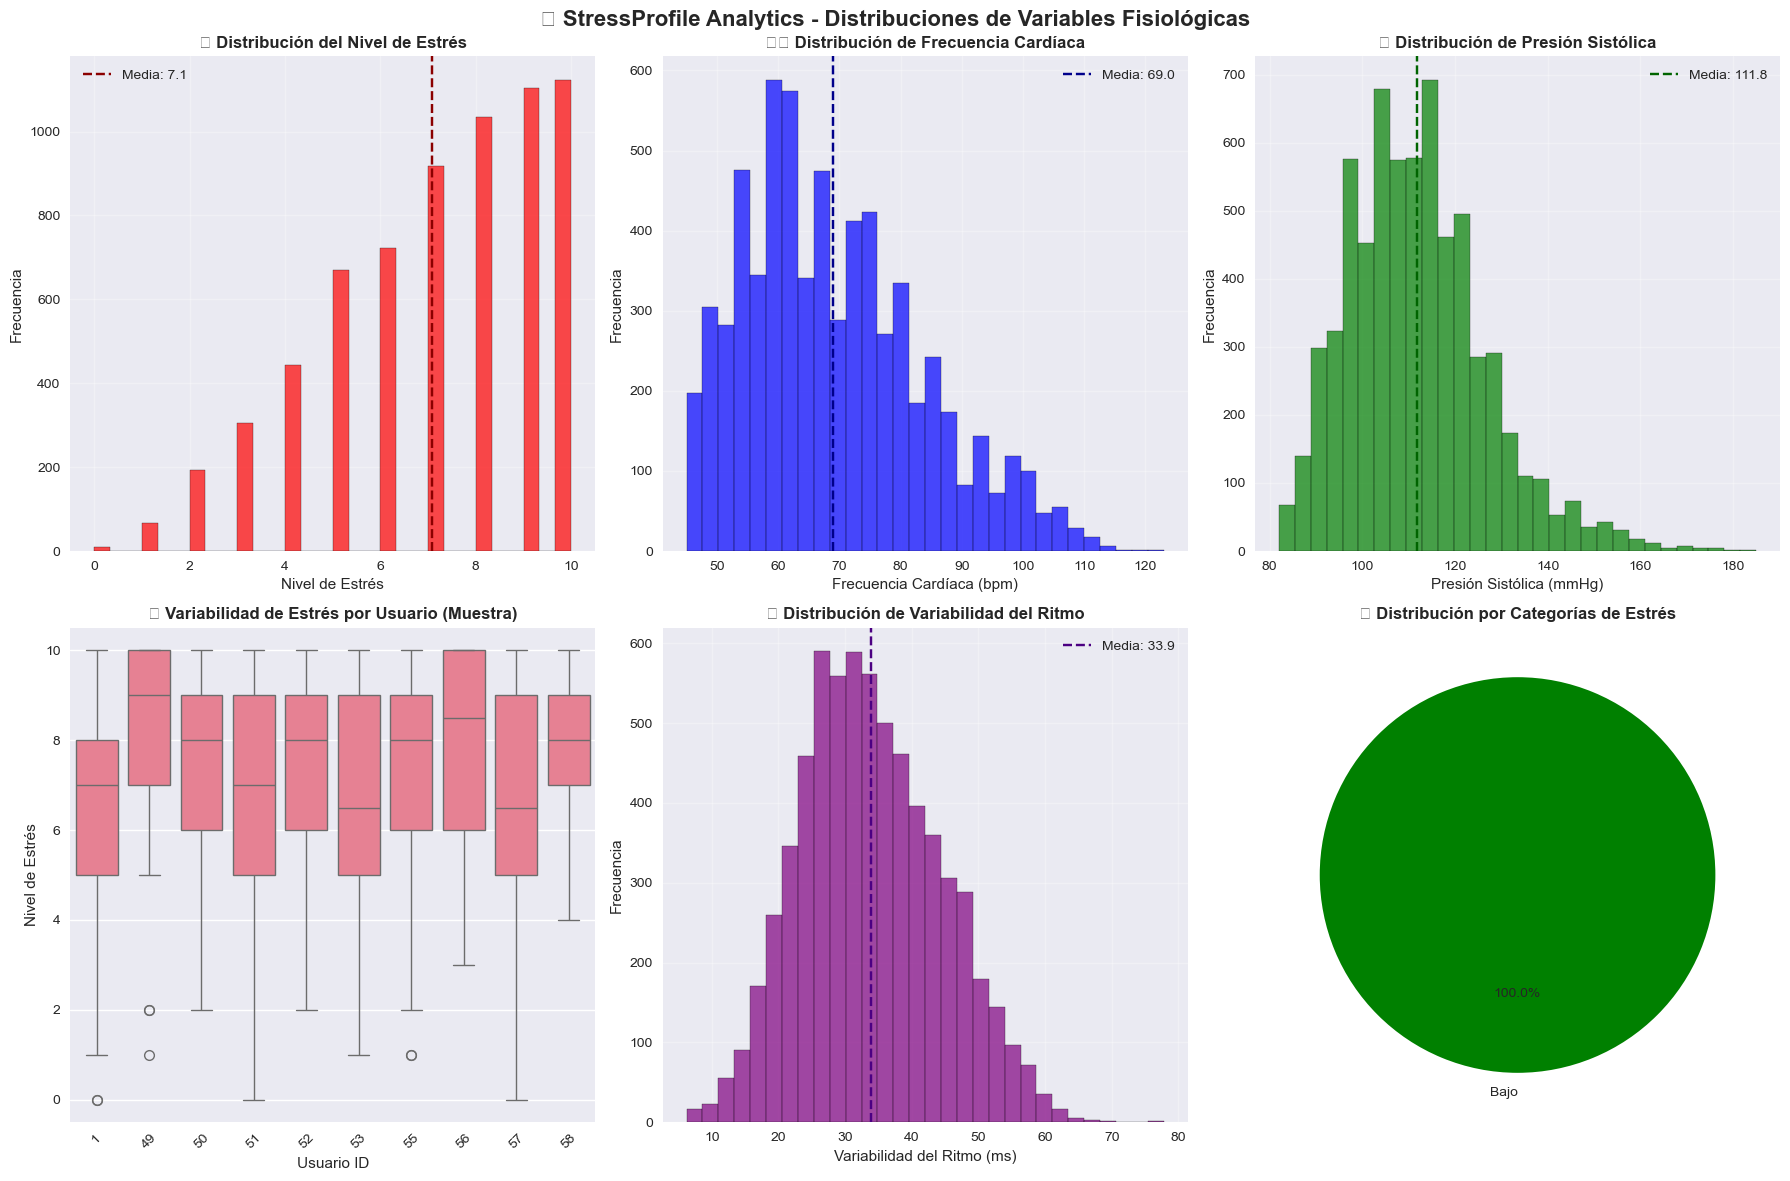

In [62]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 StressProfile Analytics - Distribuciones de Variables Fisiológicas', 
             fontsize=16, fontweight='bold')

# 1. Distribución del nivel de estrés
axes[0, 0].hist(df['Nivel_estres'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0, 0].axvline(df['Nivel_estres'].mean(), color='darkred', linestyle='--', 
                   label=f'Media: {df["Nivel_estres"].mean():.1f}')
axes[0, 0].set_title('🧠 Distribución del Nivel de Estrés', fontweight='bold')
axes[0, 0].set_xlabel('Nivel de Estrés')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribución de frecuencia cardíaca
axes[0, 1].hist(df['Frecuencia_cardiaca'], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0, 1].axvline(df['Frecuencia_cardiaca'].mean(), color='darkblue', linestyle='--',
                   label=f'Media: {df["Frecuencia_cardiaca"].mean():.1f}')
axes[0, 1].set_title('❤️ Distribución de Frecuencia Cardíaca', fontweight='bold')
axes[0, 1].set_xlabel('Frecuencia Cardíaca (bpm)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribución de presión sistólica
axes[0, 2].hist(df['Presion_sistolica'].dropna(), bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0, 2].axvline(df['Presion_sistolica'].mean(), color='darkgreen', linestyle='--',
                   label=f'Media: {df["Presion_sistolica"].mean():.1f}')
axes[0, 2].set_title('🩸 Distribución de Presión Sistólica', fontweight='bold')
axes[0, 2].set_xlabel('Presión Sistólica (mmHg)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Boxplot de estrés por usuario (muestra de usuarios)
usuarios_muestra = df['Usuario_ID'].unique()[:10]  # Primeros 10 usuarios
df_muestra = df[df['Usuario_ID'].isin(usuarios_muestra)]
sns.boxplot(data=df_muestra, x='Usuario_ID', y='Nivel_estres', ax=axes[1, 0])
axes[1, 0].set_title('📊 Variabilidad de Estrés por Usuario (Muestra)', fontweight='bold')
axes[1, 0].set_xlabel('Usuario ID')
axes[1, 0].set_ylabel('Nivel de Estrés')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Distribución de variabilidad del ritmo
axes[1, 1].hist(df['Variabilidad_ritmo'].dropna(), bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].axvline(df['Variabilidad_ritmo'].mean(), color='indigo', linestyle='--',
                   label=f'Media: {df["Variabilidad_ritmo"].mean():.1f}')
axes[1, 1].set_title('💓 Distribución de Variabilidad del Ritmo', fontweight='bold')
axes[1, 1].set_xlabel('Variabilidad del Ritmo (ms)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Distribución de categorías de estrés
categoria_counts = df['Categoria_Estres'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
axes[1, 2].pie(categoria_counts.values, labels=categoria_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
axes[1, 2].set_title('🎯 Distribución por Categorías de Estrés', fontweight='bold')

plt.tight_layout()
plt.show()

#### 1.4 MATRIZ DE CORRELACIONES INICIAL

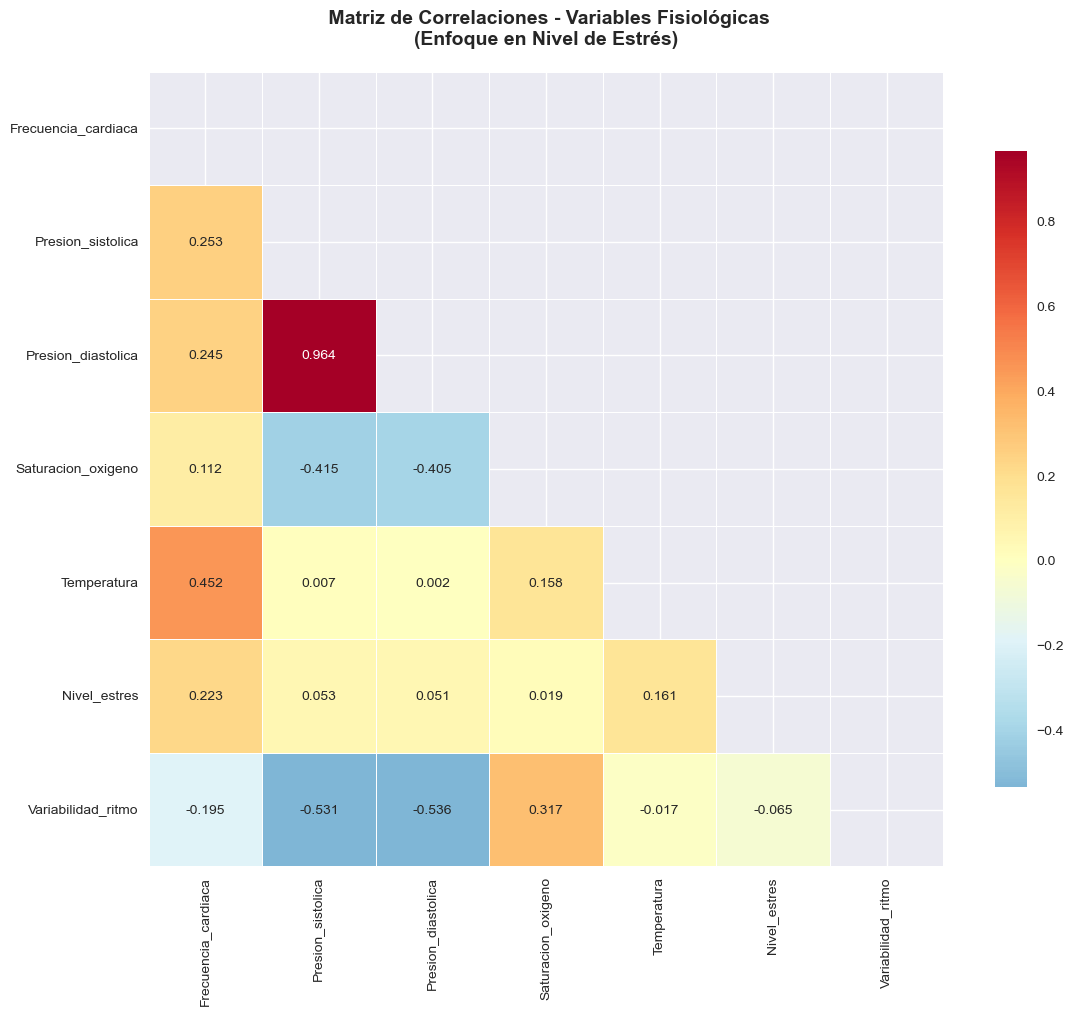


 CORRELACIONES CON EL NIVEL DE ESTRÉS:
   • Frecuencia_cardiaca: 0.223 (🟢 DÉBIL, ↗️ POSITIVA)
   • Temperatura: 0.161 (🟢 DÉBIL, ↗️ POSITIVA)
   • Variabilidad_ritmo: -0.065 (🟢 DÉBIL, ↘️ NEGATIVA)
   • Presion_sistolica: 0.053 (🟢 DÉBIL, ↗️ POSITIVA)
   • Presion_diastolica: 0.051 (🟢 DÉBIL, ↗️ POSITIVA)
   • Saturacion_oxigeno: 0.019 (🟢 DÉBIL, ↗️ POSITIVA)


In [65]:
# Seleccionar variables numéricas para correlación
variables_numericas = ['Frecuencia_cardiaca', 'Presion_sistolica', 'Presion_diastolica', 
                      'Saturacion_oxigeno', 'Temperatura', 'Nivel_estres', 'Variabilidad_ritmo']

# Calcular matriz de correlaciones
matriz_correlacion = df[variables_numericas].corr()

# Visualizar matriz de correlaciones
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
heatmap = sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                     square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title(' Matriz de Correlaciones - Variables Fisiológicas\n(Enfoque en Nivel de Estrés)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Análisis específico de correlaciones con el estrés
print(f"\n CORRELACIONES CON EL NIVEL DE ESTRÉS:")
correlaciones_estres = matriz_correlacion['Nivel_estres'].sort_values(key=abs, ascending=False)
for variable, correlacion in correlaciones_estres.items():
    if variable != 'Nivel_estres':
        if abs(correlacion) > 0.3:
            intensidad = "🔴 FUERTE" if abs(correlacion) > 0.7 else "🟡 MODERADA"
        else:
            
            intensidad = "🟢 DÉBIL"
        
        direccion = "↗️ POSITIVA" if correlacion > 0 else "↘️ NEGATIVA"
        print(f"   • {variable}: {correlacion:.3f} ({intensidad}, {direccion})")


#### 1.5 PREPARACIÓN TEMPORAL DE DATOS

In [68]:
# Convertir timestamp a datetime
df['Timestamp_medicion'] = pd.to_datetime(df['Timestamp_medicion'])

# Extraer características temporales
df['Hora'] = df['Timestamp_medicion'].dt.hour
df['Dia_semana'] = df['Timestamp_medicion'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['Mes'] = df['Timestamp_medicion'].dt.month
df['Dia_mes'] = df['Timestamp_medicion'].dt.day

# Crear categorías temporales
def categorizar_hora(hora):
    """Categorizar hora del día"""
    if 5 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 22:
        return 'Noche'
    else:
        return 'Madrugada'

def categorizar_dia(dia):
    """Categorizar día de la semana"""
    if dia < 5:
        return 'Laboral'
    else:
        return 'Fin_de_semana'

df['Periodo_dia'] = df['Hora'].apply(categorizar_hora)
df['Tipo_dia'] = df['Dia_semana'].apply(categorizar_dia)

print(f"✅ Variables temporales creadas:")
print(f"   • Hora (0-23): {df['Hora'].min()} - {df['Hora'].max()}")
print(f"   • Día de semana (0-6): {df['Dia_semana'].min()} - {df['Dia_semana'].max()}")
print(f"   • Período del día: {df['Periodo_dia'].unique()}")
print(f"   • Tipo de día: {df['Tipo_dia'].unique()}")

# Análisis temporal del estrés
print(f"\n ANÁLISIS TEMPORAL DEL ESTRÉS:")

# Por período del día
estres_por_periodo = df.groupby('Periodo_dia')['Nivel_estres'].agg(['mean', 'std', 'count'])
print(f"\n Estrés promedio por período del día:")
for periodo in ['Madrugada', 'Mañana', 'Tarde', 'Noche']:
    if periodo in estres_por_periodo.index:
        media = estres_por_periodo.loc[periodo, 'mean']
        std = estres_por_periodo.loc[periodo, 'std']
        count = estres_por_periodo.loc[periodo, 'count']
        print(f"   • {periodo}: {media:.2f} ± {std:.2f} ({count:,} mediciones)")

# Por tipo de día
estres_por_tipo_dia = df.groupby('Tipo_dia')['Nivel_estres'].agg(['mean', 'std', 'count'])
print(f"\n Estrés promedio por tipo de día:")
for tipo in estres_por_tipo_dia.index:
    media = estres_por_tipo_dia.loc[tipo, 'mean']
    std = estres_por_tipo_dia.loc[tipo, 'std']
    count = estres_por_tipo_dia.loc[tipo, 'count']
    print(f"   • {tipo}: {media:.2f} ± {std:.2f} ({count:,} mediciones)")

print(f"\n✅ PREPARACIÓN DE DATOS COMPLETADA")
print(f" Dataset preparado con {df.shape[0]:,} registros y {df.shape[1]} variables")
print(f" Listo para análisis no supervisado enfocado en patrones de estrés")

✅ Variables temporales creadas:
   • Hora (0-23): 0 - 23
   • Día de semana (0-6): 0 - 6
   • Período del día: ['Mañana' 'Tarde' 'Noche' 'Madrugada']
   • Tipo de día: ['Fin_de_semana' 'Laboral']

 ANÁLISIS TEMPORAL DEL ESTRÉS:

 Estrés promedio por período del día:
   • Madrugada: 6.55 ± 2.49 (2,919 mediciones)
   • Mañana: 7.52 ± 2.09 (1,048 mediciones)
   • Tarde: 7.77 ± 1.88 (1,149 mediciones)
   • Noche: 7.31 ± 2.20 (1,471 mediciones)

 Estrés promedio por tipo de día:
   • Fin_de_semana: 6.67 ± 2.44 (2,749 mediciones)
   • Laboral: 7.38 ± 2.18 (3,838 mediciones)

✅ PREPARACIÓN DE DATOS COMPLETADA
 Dataset preparado con 6,587 registros y 18 variables
 Listo para análisis no supervisado enfocado en patrones de estrés


## PARTE 2: INGENIERÍA DE CARACTERÍSTICAS Y AGREGACIONES POR USUARIO

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

#### 2.1 ESTADÍSTICAS DESCRIPTIVAS POR USUARIO

In [74]:
print("\n SECCIÓN 2.1: ESTADÍSTICAS DESCRIPTIVAS POR USUARIO")
print("-" * 60)
print(" Propósito: Crear perfil estadístico base de cada usuario")
print(" Qué hace: Calcula media, mediana, std, min, max para cada variable fisiológica")

def crear_estadisticas_usuario(df):
    """
    Crear estadísticas descriptivas completas por usuario
    """
    variables_fisiologicas = ['Frecuencia_cardiaca', 'Presion_sistolica', 'Presion_diastolica', 
                             'Saturacion_oxigeno', 'Temperatura', 'Nivel_estres', 'Variabilidad_ritmo']
    
    estadisticas_usuario = []
    
    for usuario_id in df['Usuario_ID'].unique():
        usuario_data = df[df['Usuario_ID'] == usuario_id]
        perfil = {'Usuario_ID': usuario_id, 'Total_mediciones': len(usuario_data)}
        
        for variable in variables_fisiologicas:
            if variable in usuario_data.columns:
                datos_variable = usuario_data[variable].dropna()
                if len(datos_variable) > 0:
                    perfil.update({
                        f'{variable}_media': datos_variable.mean(),
                        f'{variable}_mediana': datos_variable.median(),
                        f'{variable}_std': datos_variable.std(),
                        f'{variable}_min': datos_variable.min(),
                        f'{variable}_max': datos_variable.max(),
                        f'{variable}_rango': datos_variable.max() - datos_variable.min(),
                        f'{variable}_cv': datos_variable.std() / datos_variable.mean() if datos_variable.mean() != 0 else 0,
                        f'{variable}_q25': datos_variable.quantile(0.25),
                        f'{variable}_q75': datos_variable.quantile(0.75),
                        f'{variable}_iqr': datos_variable.quantile(0.75) - datos_variable.quantile(0.25)
                    })
        
        estadisticas_usuario.append(perfil)
    
    return pd.DataFrame(estadisticas_usuario)

# Crear perfiles estadísticos
print("🔄 Calculando estadísticas descriptivas por usuario...")
perfiles_estadisticos = crear_estadisticas_usuario(df)

print(f"✅ Perfiles estadísticos creados:")
print(f"   • Usuarios procesados: {len(perfiles_estadisticos):,}")
print(f"   • Características por usuario: {len(perfiles_estadisticos.columns):,}")
print(f"   • Variables base: 7 (Frecuencia cardíaca, presiones, saturación, temperatura, estrés, HRV)")
print(f"   • Estadísticas por variable: 10 (media, mediana, std, min, max, rango, CV, Q25, Q75, IQR)")

# Mostrar muestra de perfiles
print(f"\n📋 Muestra de perfiles estadísticos (primeros 3 usuarios):")
display(perfiles_estadisticos.head(3))



 SECCIÓN 2.1: ESTADÍSTICAS DESCRIPTIVAS POR USUARIO
------------------------------------------------------------
 Propósito: Crear perfil estadístico base de cada usuario
 Qué hace: Calcula media, mediana, std, min, max para cada variable fisiológica
🔄 Calculando estadísticas descriptivas por usuario...
✅ Perfiles estadísticos creados:
   • Usuarios procesados: 100
   • Características por usuario: 72
   • Variables base: 7 (Frecuencia cardíaca, presiones, saturación, temperatura, estrés, HRV)
   • Estadísticas por variable: 10 (media, mediana, std, min, max, rango, CV, Q25, Q75, IQR)

📋 Muestra de perfiles estadísticos (primeros 3 usuarios):


,Usuario_ID,Total_mediciones,Frecuencia_cardiaca_media,Frecuencia_cardiaca_mediana,Frecuencia_cardiaca_std,Frecuencia_cardiaca_min,Frecuencia_cardiaca_max,Frecuencia_cardiaca_rango,Frecuencia_cardiaca_cv,Frecuencia_cardiaca_q25,Frecuencia_cardiaca_q75,Frecuencia_cardiaca_iqr,Presion_sistolica_media,Presion_sistolica_mediana,Presion_sistolica_std,Presion_sistolica_min,Presion_sistolica_max,Presion_sistolica_rango,Presion_sistolica_cv,Presion_sistolica_q25,Presion_sistolica_q75,Presion_sistolica_iqr,Presion_diastolica_media,Presion_diastolica_mediana,Presion_diastolica_std,Presion_diastolica_min,Presion_diastolica_max,Presion_diastolica_rango,Presion_diastolica_cv,Presion_diastolica_q25,Presion_diastolica_q75,Presion_diastolica_iqr,Saturacion_oxigeno_media,Saturacion_oxigeno_mediana,Saturacion_oxigeno_std,Saturacion_oxigeno_min,Saturacion_oxigeno_max,Saturacion_oxigeno_rango,Saturacion_oxigeno_cv,Saturacion_oxigeno_q25,Saturacion_oxigeno_q75,Saturacion_oxigeno_iqr,Temperatura_media,Temperatura_mediana,Temperatura_std,Temperatura_min,Temperatura_max,Temperatura_rango,Temperatura_cv,Temperatura_q25,Temperatura_q75,Temperatura_iqr,Nivel_estres_media,Nivel_estres_mediana,Nivel_estres_std,Nivel_estres_min,Nivel_estres_max,Nivel_estres_rango,Nivel_estres_cv,Nivel_estres_q25,Nivel_estres_q75,Nivel_estres_iqr,Variabilidad_ritmo_media,Variabilidad_ritmo_mediana,Variabilidad_ritmo_std,Variabilidad_ritmo_min,Variabilidad_ritmo_max,Variabilidad_ritmo_rango,Variabilidad_ritmo_cv,Variabilidad_ritmo_q25,Variabilidad_ritmo_q75,Variabilidad_ritmo_iqr
0,1,99,67.768,65.000,13.972,45,102,57,0.206,57.500,78.000,20.500,101.465,101.000,8.451,87.000,120.000,33.000,0.083,95.000,107.000,12.000,64.455,61.000,5.474,60.000,80.000,20.000,0.085,60.000,68.500,8.500,98.305,98.500,0.992,96.300,100.000,3.700,0.010,97.450,99.100,1.650,36.475,36.500,0.499,35.400,37.700,2.300,0.014,36.100,36.800,0.700,6.535,7.000,2.459,0,10,10,0.376,5.000,8.000,3.000,38.023,37.030,8.366,22.800,56.570,33.770,0.220,30.620,44.295,13.675
1,52,78,75.500,73.500,15.049,53,110,57,0.199,62.250,86.000,23.750,121.974,123.500,9.181,105.000,138.000,33.000,0.075,115.000,130.000,15.000,80.346,82.000,6.969,67.000,87.000,20.000,0.087,74.000,87.000,13.000,97.954,98.000,0.934,95.900,100.000,4.100,0.010,97.325,98.600,1.275,36.506,36.500,0.519,35.600,37.700,2.100,0.014,36.100,36.900,0.800,7.205,8.000,2.041,2,10,8,0.283,6.000,9.000,3.000,26.001,25.910,5.329,14.860,37.310,22.450,0.205,22.612,29.565,6.953
2,51,87,66.069,63.000,13.204,45,100,55,0.200,56.500,76.000,19.500,110.000,109.000,8.568,96.000,124.000,28.000,0.078,104.000,118.000,14.000,70.782,70.000,7.368,62.000,82.000,20.000,0.104,63.000,77.500,14.500,98.170,98.200,0.949,96.300,100.000,3.700,0.010,97.400,98.950,1.550,36.538,36.500,0.464,35.700,37.500,1.800,0.013,36.200,36.900,0.700,6.931,7.000,2.537,0,10,10,0.366,5.000,9.000,4.000,37.073,36.190,8.676,19.870,58.170,38.300,0.234,30.425,42.650,12.225


#### 2.2 PATRONES TEMPORALES POR USUARIO

In [77]:
print("\n SECCIÓN 2.2: PATRONES TEMPORALES POR USUARIO")
print("-" * 55)
print(" Propósito: Capturar patrones de comportamiento temporal únicos de cada usuario")
print(" Qué hace: Analiza distribución horaria, variación día/noche, patrones semanales")

def crear_patrones_temporales(df):
    """
    Crear características de patrones temporales por usuario
    """
    patrones_temporales = []
    
    for usuario_id in df['Usuario_ID'].unique():
        usuario_data = df[df['Usuario_ID'] == usuario_id].copy()
        
        if len(usuario_data) == 0:
            continue
            
        perfil_temporal = {'Usuario_ID': usuario_id}
        
        # === PATRONES HORARIOS ===
        # Distribución de estrés por período del día
        estres_por_periodo = usuario_data.groupby('Periodo_dia')['Nivel_estres'].mean()
        for periodo in ['Madrugada', 'Mañana', 'Tarde', 'Noche']:
            perfil_temporal[f'estres_promedio_{periodo.lower()}'] = estres_por_periodo.get(periodo, np.nan)
        
        # Variabilidad horaria del estrés
        if len(usuario_data) > 1:
            perfil_temporal['estres_variabilidad_horaria'] = usuario_data.groupby('Hora')['Nivel_estres'].mean().std()
        else:
            perfil_temporal['estres_variabilidad_horaria'] = 0
        
        # === PATRONES SEMANALES ===
        # Diferencia estrés laboral vs fin de semana
        estres_por_tipo_dia = usuario_data.groupby('Tipo_dia')['Nivel_estres'].mean()
        estres_laboral = estres_por_tipo_dia.get('Laboral', np.nan)
        estres_finde = estres_por_tipo_dia.get('Fin_de_semana', np.nan)
        
        perfil_temporal['estres_laboral'] = estres_laboral
        perfil_temporal['estres_fin_semana'] = estres_finde
        perfil_temporal['diferencia_laboral_finde'] = estres_laboral - estres_finde if not (pd.isna(estres_laboral) or pd.isna(estres_finde)) else np.nan
        
        # === PATRONES DE FRECUENCIA CARDÍACA ===
        fc_por_periodo = usuario_data.groupby('Periodo_dia')['Frecuencia_cardiaca'].mean()
        for periodo in ['Madrugada', 'Mañana', 'Tarde', 'Noche']:
            perfil_temporal[f'fc_promedio_{periodo.lower()}'] = fc_por_periodo.get(periodo, np.nan)
        
        # === MÉTRICAS DE ACTIVIDAD TEMPORAL ===
        # Número de mediciones por período
        mediciones_por_periodo = usuario_data.groupby('Periodo_dia').size()
        total_mediciones = len(usuario_data)
        
        for periodo in ['Madrugada', 'Mañana', 'Tarde', 'Noche']:
            cantidad = mediciones_por_periodo.get(periodo, 0)
            perfil_temporal[f'proporcion_mediciones_{periodo.lower()}'] = cantidad / total_mediciones if total_mediciones > 0 else 0
        
        # === CONSISTENCIA TEMPORAL ===
        # Días únicos con mediciones
        usuario_data['fecha'] = usuario_data['Timestamp_medicion'].dt.date
        dias_unicos = usuario_data['fecha'].nunique()
        perfil_temporal['dias_con_mediciones'] = dias_unicos
        perfil_temporal['mediciones_por_dia_promedio'] = total_mediciones / dias_unicos if dias_unicos > 0 else 0
        
        # Regularidad de mediciones (coeficiente de variación de mediciones por día)
        mediciones_por_dia = usuario_data.groupby('fecha').size()
        perfil_temporal['regularidad_mediciones'] = mediciones_por_dia.std() / mediciones_por_dia.mean() if mediciones_por_dia.mean() > 0 else 0
        
        patrones_temporales.append(perfil_temporal)
    
    return pd.DataFrame(patrones_temporales)

# Crear patrones temporales
print(" Analizando patrones temporales por usuario...")
perfiles_temporales = crear_patrones_temporales(df)

print(f"✅ Patrones temporales creados:")
print(f"   • Características temporales: {len(perfiles_temporales.columns)-1}")
print(f"   • Patrones horarios: Estrés y FC por período del día")
print(f"   • Patrones semanales: Diferencias laboral vs fin de semana")
print(f"   • Métricas de actividad: Proporción de mediciones por período")
print(f"   • Consistencia: Regularidad y frecuencia de mediciones")

# Mostrar muestra de patrones temporales
print(f"\n Muestra de patrones temporales (primeros 3 usuarios):")
display(perfiles_temporales.head(3))



 SECCIÓN 2.2: PATRONES TEMPORALES POR USUARIO
-------------------------------------------------------
 Propósito: Capturar patrones de comportamiento temporal únicos de cada usuario
 Qué hace: Analiza distribución horaria, variación día/noche, patrones semanales
 Analizando patrones temporales por usuario...
✅ Patrones temporales creados:
   • Características temporales: 19
   • Patrones horarios: Estrés y FC por período del día
   • Patrones semanales: Diferencias laboral vs fin de semana
   • Métricas de actividad: Proporción de mediciones por período
   • Consistencia: Regularidad y frecuencia de mediciones

 Muestra de patrones temporales (primeros 3 usuarios):


,Usuario_ID,estres_promedio_madrugada,estres_promedio_mañana,estres_promedio_tarde,estres_promedio_noche,estres_variabilidad_horaria,estres_laboral,estres_fin_semana,diferencia_laboral_finde,fc_promedio_madrugada,fc_promedio_mañana,fc_promedio_tarde,fc_promedio_noche,proporcion_mediciones_madrugada,proporcion_mediciones_mañana,proporcion_mediciones_tarde,proporcion_mediciones_noche,dias_con_mediciones,mediciones_por_dia_promedio,regularidad_mediciones
0,1,6.333,5.882,6.905,7.045,1.387,7.180,5.500,1.680,56.692,72.059,81.619,70.864,0.394,0.172,0.212,0.222,30,3.300,0.552
1,52,6.909,7.667,7.789,6.882,1.085,7.289,7.091,0.198,63.909,81.889,89.842,78.588,0.423,0.115,0.244,0.218,26,3.000,0.533
2,51,6.095,7.300,7.867,7.800,1.693,7.075,6.450,0.625,56.286,79.700,78.467,70.500,0.483,0.115,0.172,0.230,26,3.346,0.348


#### 2.3 CARACTERÍSTICAS DE VARIABILIDAD Y COMPLEJIDAD

In [80]:
print("\n SECCIÓN 2.3: CARACTERÍSTICAS DE VARIABILIDAD Y COMPLEJIDAD")
print("-" * 65)
print(" Propósito: Capturar la complejidad y variabilidad en los patrones fisiológicos")
print(" Qué hace: Calcula entropía, tendencias, correlaciones internas y métricas avanzadas")

def crear_caracteristicas_variabilidad(df):
    """
    Crear características avanzadas de variabilidad y complejidad
    """
    caracteristicas_variabilidad = []
    
    for usuario_id in df['Usuario_ID'].unique():
        usuario_data = df[df['Usuario_ID'] == usuario_id].copy()
        
        if len(usuario_data) < 5:  # Necesitamos suficientes datos
            continue
            
        perfil_variabilidad = {'Usuario_ID': usuario_id}
        
        # === CORRELACIONES INTERNAS DEL USUARIO ===
        variables_numericas = ['Frecuencia_cardiaca', 'Presion_sistolica', 'Presion_diastolica', 
                              'Saturacion_oxigeno', 'Temperatura', 'Nivel_estres', 'Variabilidad_ritmo']
        
        datos_numericos = usuario_data[variables_numericas].dropna()
        
        if len(datos_numericos) > 3:
            # Correlación específica estrés-frecuencia cardíaca
            corr_estres_fc = datos_numericos['Nivel_estres'].corr(datos_numericos['Frecuencia_cardiaca'])
            perfil_variabilidad['correlacion_estres_fc'] = corr_estres_fc
            
            # Correlación estrés-variabilidad del ritmo
            corr_estres_hrv = datos_numericos['Nivel_estres'].corr(datos_numericos['Variabilidad_ritmo'])
            perfil_variabilidad['correlacion_estres_hrv'] = corr_estres_hrv
            
            # Correlación presión sistólica-frecuencia cardíaca
            corr_presion_fc = datos_numericos['Presion_sistolica'].corr(datos_numericos['Frecuencia_cardiaca'])
            perfil_variabilidad['correlacion_presion_fc'] = corr_presion_fc
            
            # Promedio de correlaciones absolutas (medida de conectividad fisiológica)
            matriz_corr = datos_numericos.corr().abs()
            np.fill_diagonal(matriz_corr.values, 0)  # Remover diagonal
            perfil_variabilidad['conectividad_fisiologica'] = matriz_corr.values.mean()
        
        # === TENDENCIAS TEMPORALES ===
        if len(usuario_data) > 5:
            # Ordenar por timestamp
            usuario_data_sorted = usuario_data.sort_values('Timestamp_medicion')
            
            # Tendencia del estrés a lo largo del tiempo
            x = np.arange(len(usuario_data_sorted))
            y_estres = usuario_data_sorted['Nivel_estres'].values
            
            if len(y_estres) > 2 and not np.isnan(y_estres).all():
                slope_estres, _, r_value_estres, _, _ = stats.linregress(x, y_estres)
                perfil_variabilidad['tendencia_estres'] = slope_estres
                perfil_variabilidad['r2_tendencia_estres'] = r_value_estres ** 2
            
            # Tendencia de la frecuencia cardíaca
            y_fc = usuario_data_sorted['Frecuencia_cardiaca'].values
            if len(y_fc) > 2 and not np.isnan(y_fc).all():
                slope_fc, _, r_value_fc, _, _ = stats.linregress(x, y_fc)
                perfil_variabilidad['tendencia_fc'] = slope_fc
                perfil_variabilidad['r2_tendencia_fc'] = r_value_fc ** 2
        
        # === MÉTRICAS DE COMPLEJIDAD ===
        # Entropía aproximada del nivel de estrés (medida de regularidad)
        estres_values = usuario_data['Nivel_estres'].dropna().values
        if len(estres_values) > 10:
            # Simplificación de entropía: variabilidad relativa
            perfil_variabilidad['complejidad_estres'] = np.std(np.diff(estres_values)) / np.mean(estres_values) if np.mean(estres_values) > 0 else 0
        
        # === CARACTERÍSTICAS DE EXTREMOS ===
        # Frecuencia de valores extremos de estrés
        estres_q90 = usuario_data['Nivel_estres'].quantile(0.9)
        estres_q10 = usuario_data['Nivel_estres'].quantile(0.1)
        
        perfil_variabilidad['frecuencia_estres_alto'] = (usuario_data['Nivel_estres'] > estres_q90).mean()
        perfil_variabilidad['frecuencia_estres_bajo'] = (usuario_data['Nivel_estres'] < estres_q10).mean()
        
        # === REACTIVIDAD CARDIOVASCULAR ===
        # Cambios rápidos en frecuencia cardíaca
        fc_diff = np.abs(np.diff(usuario_data.sort_values('Timestamp_medicion')['Frecuencia_cardiaca'].dropna()))
        if len(fc_diff) > 0:
            perfil_variabilidad['reactividad_fc_promedio'] = np.mean(fc_diff)
            perfil_variabilidad['reactividad_fc_max'] = np.max(fc_diff)
        
        caracteristicas_variabilidad.append(perfil_variabilidad)
    
    return pd.DataFrame(caracteristicas_variabilidad)

# Crear características de variabilidad
print(" Calculando características de variabilidad y complejidad...")
perfiles_variabilidad = crear_caracteristicas_variabilidad(df)

print(f"✅ Características de variabilidad creadas:")
print(f"   • Características de complejidad: {len(perfiles_variabilidad.columns)-1}")
print(f"   • Correlaciones internas: Estrés-FC, Estrés-HRV, Presión-FC")
print(f"   • Tendencias temporales: Evolución de estrés y FC")
print(f"   • Métricas de extremos: Frecuencia de valores altos/bajos")
print(f"   • Reactividad: Cambios rápidos en parámetros")



 SECCIÓN 2.3: CARACTERÍSTICAS DE VARIABILIDAD Y COMPLEJIDAD
-----------------------------------------------------------------
 Propósito: Capturar la complejidad y variabilidad en los patrones fisiológicos
 Qué hace: Calcula entropía, tendencias, correlaciones internas y métricas avanzadas
 Calculando características de variabilidad y complejidad...
✅ Características de variabilidad creadas:
   • Características de complejidad: 13
   • Correlaciones internas: Estrés-FC, Estrés-HRV, Presión-FC
   • Tendencias temporales: Evolución de estrés y FC
   • Métricas de extremos: Frecuencia de valores altos/bajos
   • Reactividad: Cambios rápidos en parámetros


#### 2.4 CONSOLIDACIÓN DE PERFILES DE USUARIO

In [85]:
print("\n SECCIÓN 2.4: CONSOLIDACIÓN DE PERFILES DE USUARIO")
print("-" * 58)
print(" Propósito: Unificar todas las características en un dataset completo por usuario")
print(" Qué hace: Merge de estadísticas, patrones temporales y variabilidad")

# Consolidar todos los perfiles
print(" Consolidando perfiles de usuario...")

# Hacer merge de todos los perfiles
perfiles_completos = perfiles_estadisticos.copy()

# Merge con patrones temporales
perfiles_completos = perfiles_completos.merge(perfiles_temporales, on='Usuario_ID', how='left')

# Merge con características de variabilidad
perfiles_completos = perfiles_completos.merge(perfiles_variabilidad, on='Usuario_ID', how='left')

print(f"✅ Perfiles consolidados:")
print(f"   • Usuarios totales: {len(perfiles_completos):,}")
print(f"   • Características totales: {len(perfiles_completos.columns)-1}")
print(f"   • Estadísticas descriptivas: ~70 características")
print(f"   • Patrones temporales: ~25 características") 
print(f"   • Variabilidad y complejidad: ~15 características")

# Verificar completitud de datos
print(f"\n Completitud de datos:")
missing_percentages = (perfiles_completos.isnull().sum() / len(perfiles_completos)) * 100
caracteristicas_completas = (missing_percentages == 0).sum()
caracteristicas_parciales = ((missing_percentages > 0) & (missing_percentages < 50)).sum()
caracteristicas_incompletas = (missing_percentages >= 50).sum()

print(f"   • Características completas (0% faltante): {caracteristicas_completas}")
print(f"   • Características parciales (1-49% faltante): {caracteristicas_parciales}")
print(f"   • Características incompletas (≥50% faltante): {caracteristicas_incompletas}")



 SECCIÓN 2.4: CONSOLIDACIÓN DE PERFILES DE USUARIO
----------------------------------------------------------
 Propósito: Unificar todas las características en un dataset completo por usuario
 Qué hace: Merge de estadísticas, patrones temporales y variabilidad
 Consolidando perfiles de usuario...
✅ Perfiles consolidados:
   • Usuarios totales: 100
   • Características totales: 103
   • Estadísticas descriptivas: ~70 características
   • Patrones temporales: ~25 características
   • Variabilidad y complejidad: ~15 características

 Completitud de datos:
   • Características completas (0% faltante): 82
   • Características parciales (1-49% faltante): 22
   • Características incompletas (≥50% faltante): 0


### 2.5 CREACIÓN DE CARACTERÍSTICAS DERIVADAS DE ESTRÉS

In [88]:
print("\n SECCIÓN 2.5: CARACTERÍSTICAS DERIVADAS ESPECÍFICAS DE ESTRÉS")
print("-" * 70)
print(" Propósito: Crear métricas específicas centradas en el comportamiento del estrés")
print(" Qué hace: Índices compuestos, ratios y categorización de perfiles de estrés")

def crear_indices_estres(df_perfiles):
    """
    Crear índices y características derivadas específicas de estrés
    """
    df_indices = df_perfiles.copy()
    
    # === ÍNDICES DE ESTRÉS ===
    # Índice de Intensidad de Estrés (combinación de media y máximo)
    df_indices['indice_intensidad_estres'] = (
        df_indices['Nivel_estres_media'] * 0.6 + 
        df_indices['Nivel_estres_max'] * 0.4
    )
    
    # Índice de Variabilidad de Estrés (combinación de std y rango)
    df_indices['indice_variabilidad_estres'] = (
        df_indices['Nivel_estres_std'] * 0.7 + 
        df_indices['Nivel_estres_rango'] * 0.3
    )
    
    # === RATIOS CARDIOVASCULARES-ESTRÉS ===
    # Ratio Estrés/FC (eficiencia cardiovascular bajo estrés)
    df_indices['ratio_estres_fc'] = df_indices['Nivel_estres_media'] / df_indices['Frecuencia_cardiaca_media']
    
    # Ratio Estrés/HRV (impacto del estrés en variabilidad)
    df_indices['ratio_estres_hrv'] = df_indices['Nivel_estres_media'] / df_indices['Variabilidad_ritmo_media']
    
    # === CATEGORIZACIÓN DE PERFILES DE ESTRÉS ===
    # Perfil de Reactividad al Estrés
    def categorizar_reactividad_estres(row):
        intensidad = row['indice_intensidad_estres']
        variabilidad = row['indice_variabilidad_estres']
        
        if pd.isna(intensidad) or pd.isna(variabilidad):
            return 'Indefinido'
        
        if intensidad > df_indices['indice_intensidad_estres'].quantile(0.75):
            if variabilidad > df_indices['indice_variabilidad_estres'].quantile(0.75):
                return 'Alto_Reactivo'  # Alto estrés + alta variabilidad
            else:
                return 'Alto_Estable'   # Alto estrés + baja variabilidad
        else:
            if variabilidad > df_indices['indice_variabilidad_estres'].quantile(0.75):
                return 'Bajo_Reactivo'  # Bajo estrés + alta variabilidad
            else:
                return 'Bajo_Estable'   # Bajo estrés + baja variabilidad
    
    df_indices['perfil_reactividad_estres'] = df_indices.apply(categorizar_reactividad_estres, axis=1)
    
    # === MÉTRICAS DE EQUILIBRIO ===
    # Equilibrio día/noche en estrés
    df_indices['equilibrio_dia_noche_estres'] = abs(
        df_indices['estres_promedio_mañana'] + df_indices['estres_promedio_tarde'] - 
        df_indices['estres_promedio_noche'] - df_indices['estres_promedio_madrugada']
    ) / 2
    
    # === ÍNDICE COMPUESTO DE SALUD CARDIOVASCULAR ===
    # Normalizar variables para el índice (usar robust scaling)
    variables_salud = ['Frecuencia_cardiaca_media', 'Presion_sistolica_media', 'Variabilidad_ritmo_media']
    
    # Crear índice invertido de estrés (menor estrés = mejor salud)
    max_estres = df_indices['Nivel_estres_media'].max()
    df_indices['estres_invertido'] = max_estres - df_indices['Nivel_estres_media']
    
    # Índice simple de salud cardiovascular (necesita normalización posterior)
    df_indices['indice_salud_cardiovascular'] = (
        df_indices['estres_invertido'] * 0.4 +           # 40% peso al bajo estrés
        df_indices['Variabilidad_ritmo_media'] * 0.3 +   # 30% peso a buena HRV
        (200 - df_indices['Frecuencia_cardiaca_media']) * 0.3  # 30% peso a FC moderada
    )
    
    return df_indices

# Crear características derivadas de estrés
print(" Creando índices y características derivadas de estrés...")
perfiles_finales = crear_indices_estres(perfiles_completos)

print(f"✅ Características derivadas de estrés creadas:")
print(f"   • Índice de Intensidad de Estrés")
print(f"   • Índice de Variabilidad de Estrés") 
print(f"   • Ratios cardiovasculares-estrés")
print(f"   • Perfil de Reactividad al Estrés (4 categorías)")
print(f"   • Métricas de equilibrio temporal")
print(f"   • Índice compuesto de salud cardiovascular")

# Mostrar distribución de perfiles de reactividad
print(f"\n Distribución de Perfiles de Reactividad al Estrés:")
distribucion_reactividad = perfiles_finales['perfil_reactividad_estres'].value_counts()
for perfil, cantidad in distribucion_reactividad.items():
    porcentaje = (cantidad / len(perfiles_finales)) * 100
    print(f"   • {perfil}: {cantidad} usuarios ({porcentaje:.1f}%)")



 SECCIÓN 2.5: CARACTERÍSTICAS DERIVADAS ESPECÍFICAS DE ESTRÉS
----------------------------------------------------------------------
 Propósito: Crear métricas específicas centradas en el comportamiento del estrés
 Qué hace: Índices compuestos, ratios y categorización de perfiles de estrés
 Creando índices y características derivadas de estrés...
✅ Características derivadas de estrés creadas:
   • Índice de Intensidad de Estrés
   • Índice de Variabilidad de Estrés
   • Ratios cardiovasculares-estrés
   • Perfil de Reactividad al Estrés (4 categorías)
   • Métricas de equilibrio temporal
   • Índice compuesto de salud cardiovascular

 Distribución de Perfiles de Reactividad al Estrés:
   • Bajo_Estable: 51 usuarios (51.0%)
   • Bajo_Reactivo: 24 usuarios (24.0%)
   • Alto_Estable: 24 usuarios (24.0%)
   • Alto_Reactivo: 1 usuarios (1.0%)


#### 2.6 PREPARACIÓN PARA CLUSTERING

In [91]:
print("\n SECCIÓN 2.6: PREPARACIÓN FINAL PARA CLUSTERING")
print("-" * 55)
print("Propósito: Preparar dataset final limpio y escalado para algoritmos de clustering")
print(" Qué hace: Limpieza, selección de características y escalado")

# Seleccionar características numéricas para clustering
columnas_excluir = ['Usuario_ID', 'perfil_reactividad_estres']
caracteristicas_numericas = [col for col in perfiles_finales.columns 
                            if col not in columnas_excluir and perfiles_finales[col].dtype in ['float64', 'int64']]

print(f" Preparando dataset para clustering...")
print(f"   • Características totales disponibles: {len(caracteristicas_numericas)}")

# Crear dataset para clustering
X_clustering = perfiles_finales[caracteristicas_numericas].copy()

# Información sobre valores faltantes
missing_info = X_clustering.isnull().sum()
caracteristicas_sin_faltantes = (missing_info == 0).sum()
caracteristicas_con_faltantes = (missing_info > 0).sum()

print(f"   • Características sin valores faltantes: {caracteristicas_sin_faltantes}")
print(f"   • Características con valores faltantes: {caracteristicas_con_faltantes}")

# Eliminar características con demasiados valores faltantes (>50%)
umbral_faltantes = 0.5
caracteristicas_validas = missing_info[missing_info / len(X_clustering) <= umbral_faltantes].index
X_clustering_limpio = X_clustering[caracteristicas_validas].copy()

print(f"   • Características después de limpieza: {len(caracteristicas_validas)}")

# Imputar valores faltantes restantes con la mediana
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_clustering_imputado = pd.DataFrame(
    imputer.fit_transform(X_clustering_limpio),
    columns=caracteristicas_validas,
    index=X_clustering_limpio.index
)

# Verificar que no hay valores infinitos o NaN
X_clustering_final = X_clustering_imputado.replace([np.inf, -np.inf], np.nan)
X_clustering_final = X_clustering_final.dropna()

print(f"✅ Dataset final para clustering:")
print(f"   • Usuarios: {len(X_clustering_final)}")
print(f"   • Características: {len(X_clustering_final.columns)}")
print(f"   • Valores faltantes: {X_clustering_final.isnull().sum().sum()}")
print(f"   • Valores infinitos: {np.isinf(X_clustering_final.values).sum()}")

# Guardar información de usuarios válidos
usuarios_validos = perfiles_finales.loc[X_clustering_final.index, 'Usuario_ID'].values

print(f"\n Datasets preparados:")
print(f"   • perfiles_finales: Perfiles completos con todas las características")
print(f"   • X_clustering_final: Dataset numérico limpio para clustering")
print(f"   • usuarios_validos: IDs de usuarios incluidos en el análisis")

print(f"\n✅ INGENIERÍA DE CARACTERÍSTICAS COMPLETADA")
print(f" Listo para aplicar algoritmos de clustering no supervisado")
print("=" * 80)


 SECCIÓN 2.6: PREPARACIÓN FINAL PARA CLUSTERING
-------------------------------------------------------
Propósito: Preparar dataset final limpio y escalado para algoritmos de clustering
 Qué hace: Limpieza, selección de características y escalado
 Preparando dataset para clustering...
   • Características totales disponibles: 110
   • Características sin valores faltantes: 87
   • Características con valores faltantes: 23
   • Características después de limpieza: 110
✅ Dataset final para clustering:
   • Usuarios: 100
   • Características: 110
   • Valores faltantes: 0
   • Valores infinitos: 0

 Datasets preparados:
   • perfiles_finales: Perfiles completos con todas las características
   • X_clustering_final: Dataset numérico limpio para clustering
   • usuarios_validos: IDs de usuarios incluidos en el análisis

✅ INGENIERÍA DE CARACTERÍSTICAS COMPLETADA
 Listo para aplicar algoritmos de clustering no supervisado


## PARTE 3: ALGORITMOS DE CLUSTERING NO SUPERVISADO

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

#### 3.1 PREPARACIÓN Y ESCALADO DE DATOS

In [97]:
print("\n SECCIÓN 3.1: PREPARACIÓN Y ESCALADO DE DATOS")
print("-" * 55)
print(" Propósito: Preparar datos con diferentes técnicas de escalado para clustering")
print(" Qué hace: Aplica StandardScaler, RobustScaler y selección de características clave")

# Verificar que tenemos los datos de la parte anterior
if 'X_clustering_final' not in locals():
    print("❌ Error: Se requieren los datos de la Parte 2")
    print("   Ejecute primero las Partes 1 y 2 del modelo")
else:
    print(f"✅ Datos de entrada: {X_clustering_final.shape[0]} usuarios × {X_clustering_final.shape[1]} características")

# === SELECCIÓN DE CARACTERÍSTICAS CLAVE PARA CLUSTERING ===
print("\n🔍 Selección de características clave centradas en estrés:")

# Características más relevantes para perfiles de estrés
caracteristicas_clave_estres = [
    # === ESTRÉS CORE ===
    'Nivel_estres_media', 'Nivel_estres_std', 'Nivel_estres_max', 
    'indice_intensidad_estres', 'indice_variabilidad_estres',
    
    # === CARDIOVASCULAR RELACIONADO CON ESTRÉS ===
    'Frecuencia_cardiaca_media', 'Frecuencia_cardiaca_std',
    'Variabilidad_ritmo_media', 'correlacion_estres_fc', 'correlacion_estres_hrv',
    
    # === PATRONES TEMPORALES DE ESTRÉS ===
    'estres_promedio_mañana', 'estres_promedio_tarde', 'estres_promedio_noche',
    'diferencia_laboral_finde', 'estres_variabilidad_horaria',
    
    # === PRESIÓN ARTERIAL ===
    'Presion_sistolica_media', 'Presion_diastolica_media',
    
    # === MÉTRICAS DERIVADAS ===
    'ratio_estres_fc', 'ratio_estres_hrv', 'indice_salud_cardiovascular',
    'conectividad_fisiologica', 'reactividad_fc_promedio'
]

# Filtrar características que existen en nuestros datos
caracteristicas_disponibles = [col for col in caracteristicas_clave_estres if col in X_clustering_final.columns]
print(f"   • Características clave identificadas: {len(caracteristicas_disponibles)}")

# Crear dataset con características clave
X_estres_focalizado = X_clustering_final[caracteristicas_disponibles].copy()

print(f"   • Dataset focalizado: {X_estres_focalizado.shape[0]} usuarios × {X_estres_focalizado.shape[1]} características")

# === ESCALADO DE DATOS ===
print(f"\n Aplicando diferentes técnicas de escalado:")

# 1. StandardScaler (normalización Z-score)
scaler_standard = StandardScaler()
X_standard = pd.DataFrame(
    scaler_standard.fit_transform(X_estres_focalizado),
    columns=X_estres_focalizado.columns,
    index=X_estres_focalizado.index
)

# 2. RobustScaler (menos sensible a outliers)
scaler_robust = RobustScaler()
X_robust = pd.DataFrame(
    scaler_robust.fit_transform(X_estres_focalizado),
    columns=X_estres_focalizado.columns,
    index=X_estres_focalizado.index
)

# 3. MinMaxScaler (escalado 0-1)
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_estres_focalizado),
    columns=X_estres_focalizado.columns,
    index=X_estres_focalizado.index
)

print(f"   ✅ StandardScaler: Media≈0, Std≈1")
print(f"   ✅ RobustScaler: Mediana≈0, IQR≈1") 
print(f"   ✅ MinMaxScaler: Rango [0,1]")

# Seleccionar escalado principal (RobustScaler por robustez)
X_scaled = X_robust.copy()
print(f"\n Escalado seleccionado: RobustScaler (más robusto a outliers)")



 SECCIÓN 3.1: PREPARACIÓN Y ESCALADO DE DATOS
-------------------------------------------------------
 Propósito: Preparar datos con diferentes técnicas de escalado para clustering
 Qué hace: Aplica StandardScaler, RobustScaler y selección de características clave
✅ Datos de entrada: 100 usuarios × 110 características

🔍 Selección de características clave centradas en estrés:
   • Características clave identificadas: 22
   • Dataset focalizado: 100 usuarios × 22 características

 Aplicando diferentes técnicas de escalado:
   ✅ StandardScaler: Media≈0, Std≈1
   ✅ RobustScaler: Mediana≈0, IQR≈1
   ✅ MinMaxScaler: Rango [0,1]

 Escalado seleccionado: RobustScaler (más robusto a outliers)


#### 3.2 DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS


 SECCIÓN 3.2: DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS
-----------------------------------------------------------------
 Propósito: Encontrar el número óptimo de clusters usando múltiples métodos
 Qué hace: Elbow method, Silhouette analysis, Calinski-Harabasz index
 Evaluando 7 configuraciones de clusters...
   • 2 clusters: Silhouette=0.420, Calinski-H=45.7, Davies-B=1.391
   • 3 clusters: Silhouette=0.416, Calinski-H=32.6, Davies-B=1.525
   • 4 clusters: Silhouette=0.138, Calinski-H=25.7, Davies-B=1.610
   • 5 clusters: Silhouette=0.121, Calinski-H=23.3, Davies-B=1.924
   • 6 clusters: Silhouette=0.145, Calinski-H=21.8, Davies-B=1.745
   • 7 clusters: Silhouette=0.153, Calinski-H=20.9, Davies-B=1.638
   • 8 clusters: Silhouette=0.134, Calinski-H=19.1, Davies-B=1.578


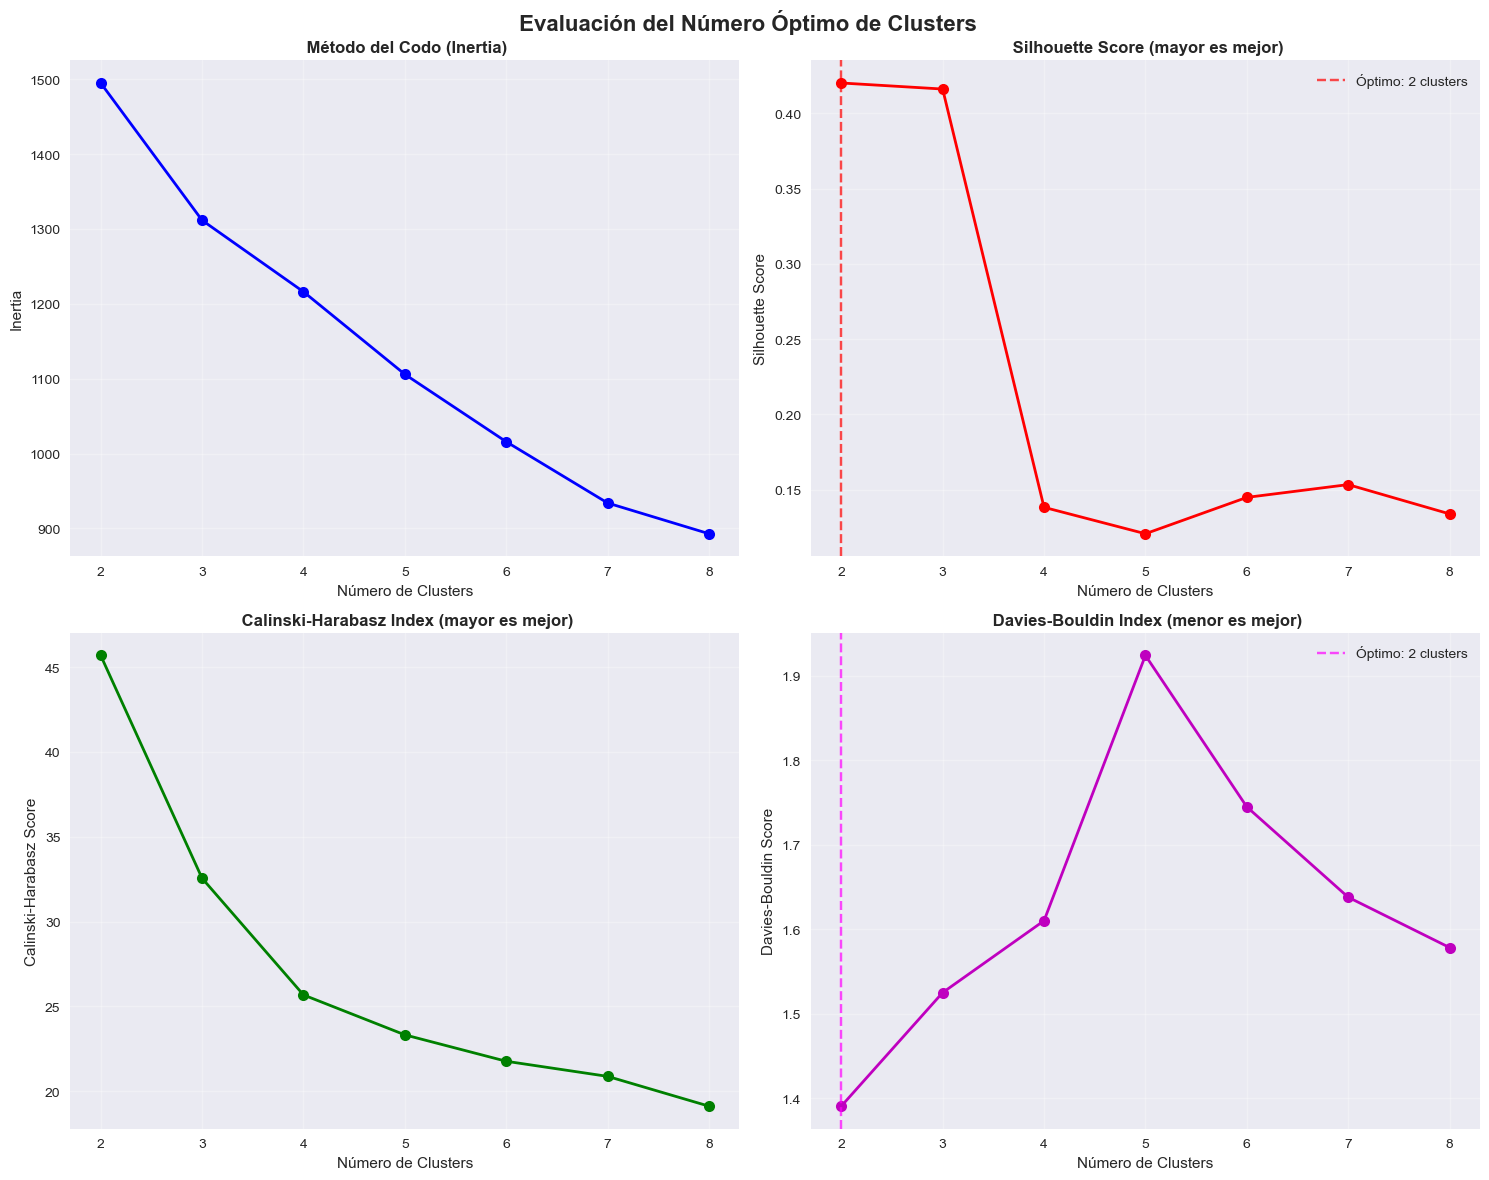


 RECOMENDACIÓN DE NÚMERO DE CLUSTERS:
   • Mejor Silhouette Score: 2 clusters (0.420)
   • Mejor Davies-Bouldin: 2 clusters (1.391)
   Número óptimo seleccionado: 2 clusters


In [100]:
print("\n SECCIÓN 3.2: DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS")
print("-" * 65)
print(" Propósito: Encontrar el número óptimo de clusters usando múltiples métodos")
print(" Qué hace: Elbow method, Silhouette analysis, Calinski-Harabasz index")

def evaluar_numero_clusters(X, max_clusters=10):
    """
    Evaluar diferentes números de clusters usando múltiples métricas
    """
    n_clusters_range = range(2, max_clusters + 1)
    
    # Métricas para almacenar
    inertias = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    
    print(f" Evaluando {len(n_clusters_range)} configuraciones de clusters...")
    
    for n_clusters in n_clusters_range:
        # K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        
        # Métricas
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, cluster_labels))
        calinski_scores.append(calinski_harabasz_score(X, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))
        
        print(f"   • {n_clusters} clusters: Silhouette={silhouette_scores[-1]:.3f}, "
              f"Calinski-H={calinski_scores[-1]:.1f}, Davies-B={davies_bouldin_scores[-1]:.3f}")
    
    return {
        'n_clusters': list(n_clusters_range),
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'calinski_scores': calinski_scores,
        'davies_bouldin_scores': davies_bouldin_scores
    }

# Evaluar número óptimo de clusters
metricas_clusters = evaluar_numero_clusters(X_scaled, max_clusters=8)

# === VISUALIZACIÓN DE MÉTRICAS ===
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(' Evaluación del Número Óptimo de Clusters', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metricas_clusters['n_clusters'], metricas_clusters['inertias'], 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title(' Método del Codo (Inertia)', fontweight='bold')
axes[0, 0].set_xlabel('Número de Clusters')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].grid(True, alpha=0.3)

# 2. Silhouette Score
axes[0, 1].plot(metricas_clusters['n_clusters'], metricas_clusters['silhouette_scores'], 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_title(' Silhouette Score (mayor es mejor)', fontweight='bold')
axes[0, 1].set_xlabel('Número de Clusters')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].grid(True, alpha=0.3)

# Destacar el mejor
best_silhouette_idx = np.argmax(metricas_clusters['silhouette_scores'])
best_n_clusters_sil = metricas_clusters['n_clusters'][best_silhouette_idx]
axes[0, 1].axvline(x=best_n_clusters_sil, color='red', linestyle='--', alpha=0.7,
                   label=f'Óptimo: {best_n_clusters_sil} clusters')
axes[0, 1].legend()

# 3. Calinski-Harabasz Index
axes[1, 0].plot(metricas_clusters['n_clusters'], metricas_clusters['calinski_scores'], 'go-', linewidth=2, markersize=8)
axes[1, 0].set_title(' Calinski-Harabasz Index (mayor es mejor)', fontweight='bold')
axes[1, 0].set_xlabel('Número de Clusters')
axes[1, 0].set_ylabel('Calinski-Harabasz Score')
axes[1, 0].grid(True, alpha=0.3)

# 4. Davies-Bouldin Index
axes[1, 1].plot(metricas_clusters['n_clusters'], metricas_clusters['davies_bouldin_scores'], 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_title(' Davies-Bouldin Index (menor es mejor)', fontweight='bold')
axes[1, 1].set_xlabel('Número de Clusters')
axes[1, 1].set_ylabel('Davies-Bouldin Score')
axes[1, 1].grid(True, alpha=0.3)

# Destacar el mejor
best_db_idx = np.argmin(metricas_clusters['davies_bouldin_scores'])
best_n_clusters_db = metricas_clusters['n_clusters'][best_db_idx]
axes[1, 1].axvline(x=best_n_clusters_db, color='magenta', linestyle='--', alpha=0.7,
                   label=f'Óptimo: {best_n_clusters_db} clusters')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# === RECOMENDACIÓN DE NÚMERO DE CLUSTERS ===
print(f"\n RECOMENDACIÓN DE NÚMERO DE CLUSTERS:")
print(f"   • Mejor Silhouette Score: {best_n_clusters_sil} clusters ({metricas_clusters['silhouette_scores'][best_silhouette_idx]:.3f})")
print(f"   • Mejor Davies-Bouldin: {best_n_clusters_db} clusters ({metricas_clusters['davies_bouldin_scores'][best_db_idx]:.3f})")

# Seleccionar número óptimo (considerando múltiples métricas)
n_clusters_optimo = best_n_clusters_sil  # Priorizar Silhouette
print(f"   Número óptimo seleccionado: {n_clusters_optimo} clusters")


#### 3.3 APLICACIÓN DE MÚLTIPLES ALGORITMOS DE CLUSTERING

In [103]:
print("\n SECCIÓN 3.3: APLICACIÓN DE MÚLTIPLES ALGORITMOS DE CLUSTERING")
print("-" * 75)
print(" Propósito: Comparar diferentes algoritmos de clustering en los mismos datos")
print(" Qué hace: K-means, DBSCAN, Hierarchical Clustering, Gaussian Mixture Model")

# === 1. K-MEANS CLUSTERING ===
print(f"\n🔵 Aplicando K-Means Clustering (k={n_clusters_optimo})...")
kmeans = KMeans(n_clusters=n_clusters_optimo, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Métricas K-means
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
calinski_kmeans = calinski_harabasz_score(X_scaled, labels_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

print(f"   ✅ K-Means completado:")
print(f"      • Silhouette Score: {silhouette_kmeans:.3f}")
print(f"      • Calinski-Harabasz: {calinski_kmeans:.1f}")
print(f"      • Davies-Bouldin: {davies_bouldin_kmeans:.3f}")

# === 2. DBSCAN CLUSTERING ===
print(f"\n🟡 Aplicando DBSCAN Clustering...")

# Determinar parámetros óptimos para DBSCAN
from sklearn.neighbors import NearestNeighbors

# Calcular k-distance para determinar eps
k = 5  # número de vecinos
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1], axis=0)

# Usar percentil 90 como estimación de eps
eps_optimo = np.percentile(distances, 90)

dbscan = DBSCAN(eps=eps_optimo, min_samples=k)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Métricas DBSCAN (si hay más de 1 cluster)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_dbscan = list(labels_dbscan).count(-1)

print(f"   ✅ DBSCAN completado:")
print(f"      • Clusters encontrados: {n_clusters_dbscan}")
print(f"      • Puntos de ruido: {n_noise_dbscan} ({n_noise_dbscan/len(labels_dbscan)*100:.1f}%)")

if n_clusters_dbscan > 1:
    # Excluir puntos de ruido para métricas
    mask_no_noise = labels_dbscan != -1
    silhouette_dbscan = silhouette_score(X_scaled[mask_no_noise], labels_dbscan[mask_no_noise])
    print(f"      • Silhouette Score: {silhouette_dbscan:.3f}")
else:
    silhouette_dbscan = -1
    print(f"      • No se pueden calcular métricas (clusters insuficientes)")

# === 3. HIERARCHICAL CLUSTERING ===
print(f"\n🟢 Aplicando Hierarchical Clustering (k={n_clusters_optimo})...")
hierarchical = AgglomerativeClustering(n_clusters=n_clusters_optimo, linkage='ward')
labels_hierarchical = hierarchical.fit_predict(X_scaled)

# Métricas Hierarchical
silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
calinski_hierarchical = calinski_harabasz_score(X_scaled, labels_hierarchical)
davies_bouldin_hierarchical = davies_bouldin_score(X_scaled, labels_hierarchical)

print(f"   ✅ Hierarchical Clustering completado:")
print(f"      • Silhouette Score: {silhouette_hierarchical:.3f}")
print(f"      • Calinski-Harabasz: {calinski_hierarchical:.1f}")
print(f"      • Davies-Bouldin: {davies_bouldin_hierarchical:.3f}")

# === 4. GAUSSIAN MIXTURE MODEL ===
print(f"\n🟣 Aplicando Gaussian Mixture Model (k={n_clusters_optimo})...")
gmm = GaussianMixture(n_components=n_clusters_optimo, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

# Métricas GMM
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
calinski_gmm = calinski_harabasz_score(X_scaled, labels_gmm)
davies_bouldin_gmm = davies_bouldin_score(X_scaled, labels_gmm)

print(f"   ✅ Gaussian Mixture Model completado:")
print(f"      • Silhouette Score: {silhouette_gmm:.3f}")
print(f"      • Calinski-Harabasz: {calinski_gmm:.1f}")
print(f"      • Davies-Bouldin: {davies_bouldin_gmm:.3f}")
print(f"      • Log-likelihood: {gmm.score(X_scaled):.1f}")



 SECCIÓN 3.3: APLICACIÓN DE MÚLTIPLES ALGORITMOS DE CLUSTERING
---------------------------------------------------------------------------
 Propósito: Comparar diferentes algoritmos de clustering en los mismos datos
 Qué hace: K-means, DBSCAN, Hierarchical Clustering, Gaussian Mixture Model

🔵 Aplicando K-Means Clustering (k=2)...
   ✅ K-Means completado:
      • Silhouette Score: 0.420
      • Calinski-Harabasz: 45.7
      • Davies-Bouldin: 1.391

🟡 Aplicando DBSCAN Clustering...
   ✅ DBSCAN completado:
      • Clusters encontrados: 1
      • Puntos de ruido: 5 (5.0%)
      • No se pueden calcular métricas (clusters insuficientes)

🟢 Aplicando Hierarchical Clustering (k=2)...
   ✅ Hierarchical Clustering completado:
      • Silhouette Score: 0.417
      • Calinski-Harabasz: 44.4
      • Davies-Bouldin: 1.405

🟣 Aplicando Gaussian Mixture Model (k=2)...
   ✅ Gaussian Mixture Model completado:
      • Silhouette Score: 0.421
      • Calinski-Harabasz: 45.7
      • Davies-Bouldin: 1.373

#### 3.4 COMPARACIÓN DE ALGORITMOS

In [106]:
print("\n SECCIÓN 3.4: COMPARACIÓN DE ALGORITMOS DE CLUSTERING")
print("-" * 60)
print(" Propósito: Evaluar y comparar el rendimiento de todos los algoritmos")
print(" Qué hace: Tabla comparativa y visualización de resultados")

# === TABLA COMPARATIVA ===
print(f"\n TABLA COMPARATIVA DE ALGORITMOS:")
print("=" * 80)
print(f"{'Algoritmo':<20} {'Silhouette':<12} {'Calinski-H':<12} {'Davies-B':<12} {'Clusters':<10}")
print("-" * 80)
print(f"{'K-Means':<20} {silhouette_kmeans:<12.3f} {calinski_kmeans:<12.1f} {davies_bouldin_kmeans:<12.3f} {n_clusters_optimo:<10}")
print(f"{'Hierarchical':<20} {silhouette_hierarchical:<12.3f} {calinski_hierarchical:<12.1f} {davies_bouldin_hierarchical:<12.3f} {n_clusters_optimo:<10}")
print(f"{'Gaussian Mix':<20} {silhouette_gmm:<12.3f} {calinski_gmm:<12.1f} {davies_bouldin_gmm:<12.3f} {n_clusters_optimo:<10}")
if n_clusters_dbscan > 1:
    print(f"{'DBSCAN':<20} {silhouette_dbscan:<12.3f} {'N/A':<12} {'N/A':<12} {n_clusters_dbscan:<10}")
else:
    print(f"{'DBSCAN':<20} {'N/A':<12} {'N/A':<12} {'N/A':<12} {n_clusters_dbscan:<10}")
print("=" * 80)

# === SELECCIÓN DEL MEJOR ALGORITMO ===
algoritmos_comparables = {
    'K-Means': silhouette_kmeans,
    'Hierarchical': silhouette_hierarchical,
    'Gaussian Mix': silhouette_gmm
}

if n_clusters_dbscan > 1:
    algoritmos_comparables['DBSCAN'] = silhouette_dbscan

mejor_algoritmo = max(algoritmos_comparables, key=algoritmos_comparables.get)
mejor_score = algoritmos_comparables[mejor_algoritmo]

print(f"\n MEJOR ALGORITMO: {mejor_algoritmo} (Silhouette Score: {mejor_score:.3f})")

# Seleccionar labels del mejor algoritmo
if mejor_algoritmo == 'K-Means':
    labels_final = labels_kmeans
    modelo_final = kmeans
elif mejor_algoritmo == 'Hierarchical':
    labels_final = labels_hierarchical
    modelo_final = hierarchical
elif mejor_algoritmo == 'Gaussian Mix':
    labels_final = labels_gmm
    modelo_final = gmm
else:  # DBSCAN
    labels_final = labels_dbscan
    modelo_final = dbscan


 SECCIÓN 3.4: COMPARACIÓN DE ALGORITMOS DE CLUSTERING
------------------------------------------------------------
 Propósito: Evaluar y comparar el rendimiento de todos los algoritmos
 Qué hace: Tabla comparativa y visualización de resultados

 TABLA COMPARATIVA DE ALGORITMOS:
Algoritmo            Silhouette   Calinski-H   Davies-B     Clusters  
--------------------------------------------------------------------------------
K-Means              0.420        45.7         1.391        2         
Hierarchical         0.417        44.4         1.405        2         
Gaussian Mix         0.421        45.7         1.373        2         
DBSCAN               N/A          N/A          N/A          1         

 MEJOR ALGORITMO: Gaussian Mix (Silhouette Score: 0.421)


#### 3.5 REDUCCIÓN DIMENSIONAL Y VISUALIZACIÓN


 SECCIÓN 3.5: REDUCCIÓN DIMENSIONAL Y VISUALIZACIÓN
------------------------------------------------------------
 Propósito: Visualizar clusters en 2D usando PCA y t-SNE
 Qué hace: Aplica PCA y t-SNE para visualizar la estructura de clusters

 Aplicando PCA (2 componentes)...
   ✅ PCA completado:
      • Varianza explicada PC1: 0.374 (37.4%)
      • Varianza explicada PC2: 0.151 (15.1%)
      • Varianza total explicada: 0.525 (52.5%)

 Aplicando t-SNE (2 componentes)...
   ✅ t-SNE completado


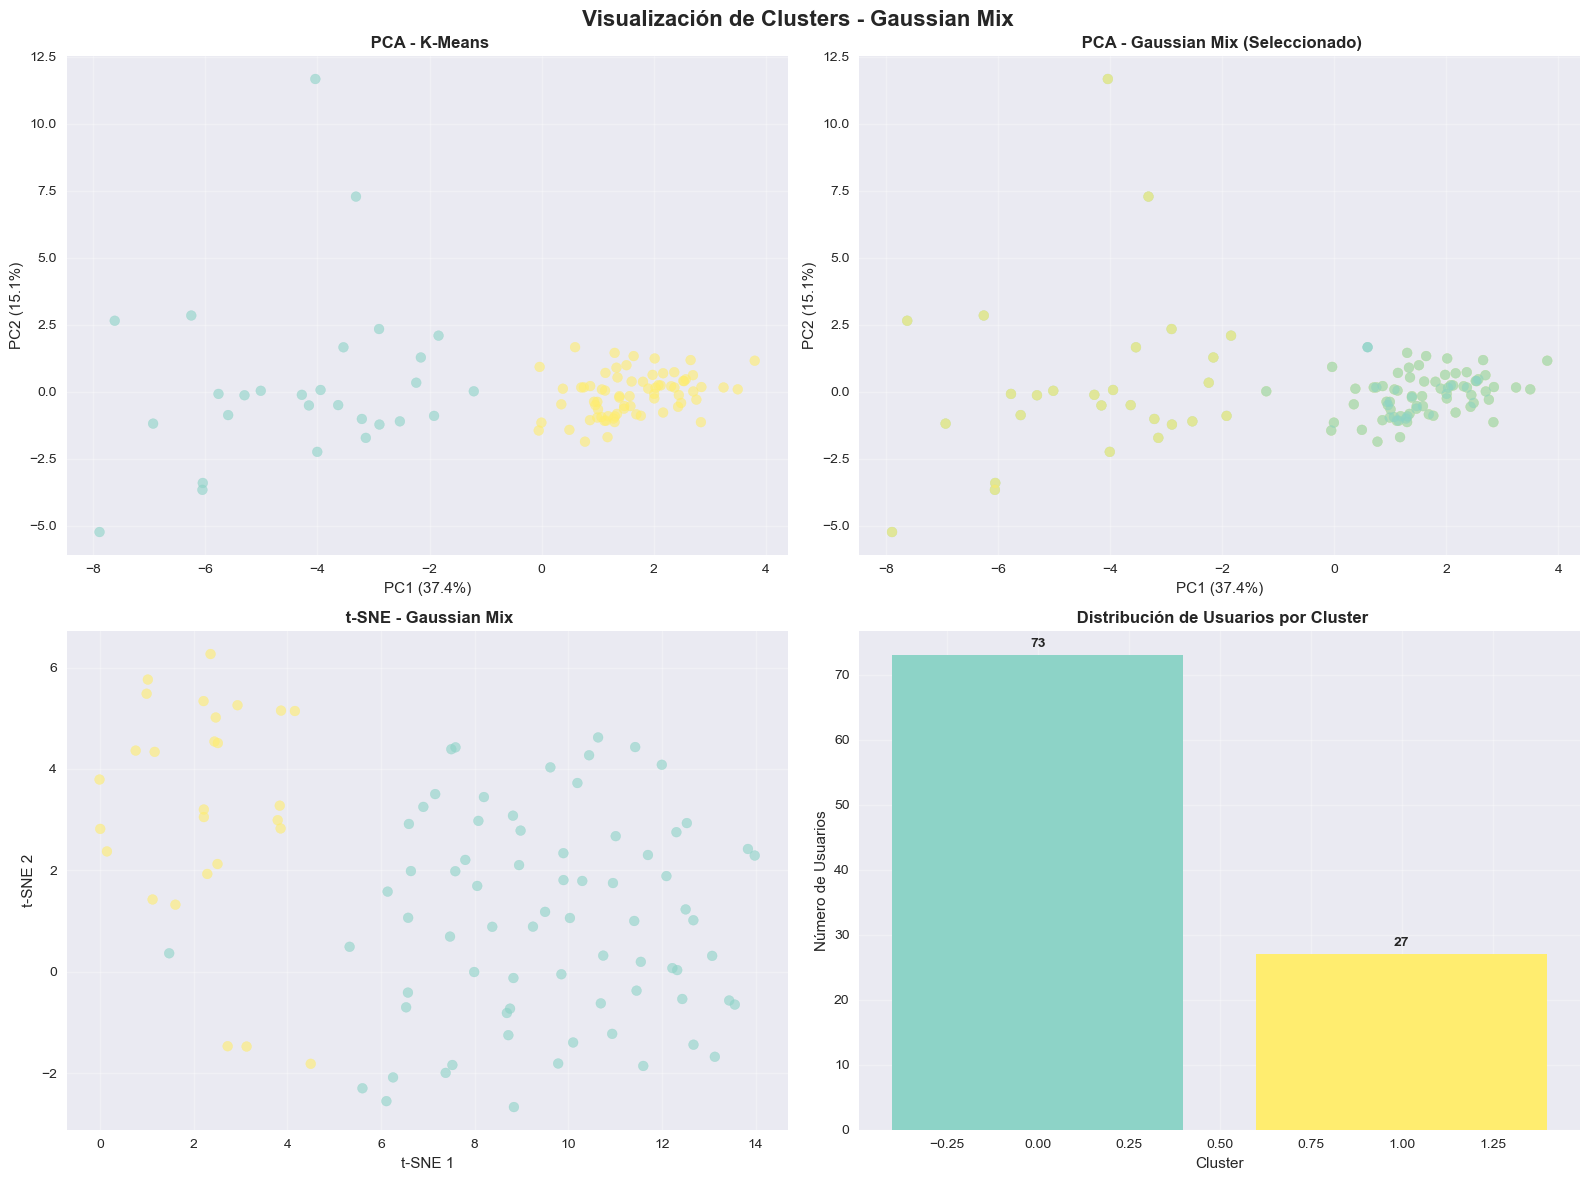


 ESTADÍSTICAS FINALES DE CLUSTERING:
   • Algoritmo seleccionado: Gaussian Mix
   • Número de clusters: 2
   • Silhouette Score: 0.421

 Distribución de usuarios por cluster:
   • Cluster 0: 73 usuarios (73.0%)
   • Cluster 1: 27 usuarios (27.0%)

✅ CLUSTERING COMPLETADO
 Perfiles de estrés identificados exitosamente
 Resultados guardados para análisis de interpretación


In [109]:
print("\n SECCIÓN 3.5: REDUCCIÓN DIMENSIONAL Y VISUALIZACIÓN")
print("-" * 60)
print(" Propósito: Visualizar clusters en 2D usando PCA y t-SNE")
print(" Qué hace: Aplica PCA y t-SNE para visualizar la estructura de clusters")

# === PCA ===
print(f"\n Aplicando PCA (2 componentes)...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"   ✅ PCA completado:")
print(f"      • Varianza explicada PC1: {pca.explained_variance_ratio_[0]:.3f} ({pca.explained_variance_ratio_[0]*100:.1f}%)")
print(f"      • Varianza explicada PC2: {pca.explained_variance_ratio_[1]:.3f} ({pca.explained_variance_ratio_[1]*100:.1f}%)")
print(f"      • Varianza total explicada: {sum(pca.explained_variance_ratio_):.3f} ({sum(pca.explained_variance_ratio_)*100:.1f}%)")

# === t-SNE ===
print(f"\n Aplicando t-SNE (2 componentes)...")
# Usar una muestra si hay muchos datos (t-SNE es computacionalmente intensivo)
if len(X_scaled) > 1000:
    muestra_indices = np.random.choice(len(X_scaled), 1000, replace=False)
    X_tsne_input = X_scaled.iloc[muestra_indices]
    labels_tsne = labels_final[muestra_indices]
    print(f"   • Usando muestra de 1000 usuarios para t-SNE")
else:
    X_tsne_input = X_scaled
    labels_tsne = labels_final

tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(X_tsne_input)-1))
X_tsne = tsne.fit_transform(X_tsne_input)

print(f"   ✅ t-SNE completado")

# === VISUALIZACIÓN DE CLUSTERS ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f' Visualización de Clusters - {mejor_algoritmo}', fontsize=16, fontweight='bold')

# Colores para clusters
colors = plt.cm.Set3(np.linspace(0, 1, len(np.unique(labels_final))))

# 1. PCA - Todos los algoritmos comparación
algorithms_labels = {
    'K-Means': labels_kmeans,
    'Hierarchical': labels_hierarchical,
    'Gaussian Mix': labels_gmm
}

for i, (alg_name, alg_labels) in enumerate(algorithms_labels.items()):
    if i < 2:  # Solo mostrar los primeros 2
        ax = axes[0, i]
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=alg_labels, cmap='Set3', alpha=0.6, s=50)
        ax.set_title(f' PCA - {alg_name}', fontweight='bold')
        ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        ax.grid(True, alpha=0.3)

# 2. PCA - Algoritmo seleccionado
scatter = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_final, cmap='Set3', alpha=0.6, s=50)
axes[0, 1].set_title(f' PCA - {mejor_algoritmo} (Seleccionado)', fontweight='bold')
axes[0, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0, 1].grid(True, alpha=0.3)

# 3. t-SNE
scatter = axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='Set3', alpha=0.6, s=50)
axes[1, 0].set_title(f' t-SNE - {mejor_algoritmo}', fontweight='bold')
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')
axes[1, 0].grid(True, alpha=0.3)

# 4. Distribución de clusters
cluster_counts = pd.Series(labels_final).value_counts().sort_index()
axes[1, 1].bar(range(len(cluster_counts)), cluster_counts.values, color=colors[:len(cluster_counts)])
axes[1, 1].set_title(' Distribución de Usuarios por Cluster', fontweight='bold')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Número de Usuarios')
axes[1, 1].grid(True, alpha=0.3)

# Añadir etiquetas con conteos
for i, count in enumerate(cluster_counts.values):
    axes[1, 1].text(i, count + max(cluster_counts.values)*0.01, str(count), 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# === ESTADÍSTICAS FINALES ===
print(f"\n ESTADÍSTICAS FINALES DE CLUSTERING:")
print(f"   • Algoritmo seleccionado: {mejor_algoritmo}")
print(f"   • Número de clusters: {len(np.unique(labels_final))}")
print(f"   • Silhouette Score: {mejor_score:.3f}")

print(f"\n Distribución de usuarios por cluster:")
for cluster_id, count in cluster_counts.items():
    porcentaje = (count / len(labels_final)) * 100
    print(f"   • Cluster {cluster_id}: {count} usuarios ({porcentaje:.1f}%)")

# Guardar resultados para la siguiente parte
resultados_clustering = {
    'labels': labels_final,
    'algoritmo': mejor_algoritmo,
    'modelo': modelo_final,
    'X_scaled': X_scaled,
    'caracteristicas': caracteristicas_disponibles,
    'pca_componentes': X_pca,
    'usuarios_validos': usuarios_validos
}

print(f"\n✅ CLUSTERING COMPLETADO")
print(f" Perfiles de estrés identificados exitosamente")
print(f" Resultados guardados para análisis de interpretación")


## PARTE 4: INTERPRETACIÓN Y CARACTERIZACIÓN DE CLUSTERS

 OBJETIVO DE ESTA PARTE: Interpretar y caracterizar médicamente los clusters identificados para transformarlos en perfiles clínicamente significativos. Crear nomenclatura médica y entender las diferencias comportamentales entre grupos.

 ESTRATEGIA: Análisis estadístico comparativo, caracterización médica, nomenclatura de perfiles, identificación de patrones únicos y creación de recomendaciones específicas por cluster.


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("\n STRESSPROFILE ANALYTICS - PARTE 4: INTERPRETACIÓN DE CLUSTERS")
print("=" * 80)
print(" Objetivo: Transformar clusters en perfiles médicamente significativos")
print(" Enfoque: Caracterización clínica y nomenclatura de perfiles de estrés")
print("=" * 80)


 STRESSPROFILE ANALYTICS - PARTE 4: INTERPRETACIÓN DE CLUSTERS
 Objetivo: Transformar clusters en perfiles médicamente significativos
 Enfoque: Caracterización clínica y nomenclatura de perfiles de estrés


In [119]:
# Verificar que tenemos los resultados del clustering
if 'resultados_clustering' not in locals():
    print("❌ Error: Se requieren los resultados de la Parte 3")
    print("   Ejecute primero las Partes 1, 2 y 3 del modelo")
else:
    print(f"✅ Datos de clustering disponibles:")
    print(f"   • Algoritmo usado: {resultados_clustering['algoritmo']}")
    print(f"   • Usuarios analizados: {len(resultados_clustering['labels'])}")
    print(f"   • Clusters identificados: {len(np.unique(resultados_clustering['labels']))}")


✅ Datos de clustering disponibles:
   • Algoritmo usado: Gaussian Mix
   • Usuarios analizados: 100
   • Clusters identificados: 2


#### 4.1 PREPARACIÓN DE DATOS PARA INTERPRETACIÓN

In [122]:
print("\n SECCIÓN 4.1: PREPARACIÓN DE DATOS PARA INTERPRETACIÓN")
print("-" * 65)
print(" Propósito: Consolidar datos de clustering con perfiles originales")
print(" Qué hace: Merge de clusters con características originales y cálculo de estadísticas")

# Crear DataFrame con resultados de clustering
labels_clustering = resultados_clustering['labels']
usuarios_clustering = resultados_clustering['usuarios_validos']

# Crear DataFrame de resultados
df_clusters = pd.DataFrame({
    'Usuario_ID': usuarios_clustering,
    'Cluster': labels_clustering
})

# Merge con perfiles completos (de la Parte 2)
if 'perfiles_finales' in locals():
    df_interpretacion = perfiles_finales.merge(df_clusters, on='Usuario_ID', how='inner')
    print(f"✅ Datos consolidados:")
    print(f"   • Usuarios con clusters asignados: {len(df_interpretacion)}")
    print(f"   • Características disponibles: {len(df_interpretacion.columns)-2}")  # -2 por Usuario_ID y Cluster
else:
    print("❌ Error: Se requieren los perfiles_finales de la Parte 2")

# Información básica de clusters
cluster_counts = df_interpretacion['Cluster'].value_counts().sort_index()
print(f"\n Distribución de clusters:")
for cluster_id, count in cluster_counts.items():
    porcentaje = (count / len(df_interpretacion)) * 100
    print(f"   • Cluster {cluster_id}: {count} usuarios ({porcentaje:.1f}%)")



 SECCIÓN 4.1: PREPARACIÓN DE DATOS PARA INTERPRETACIÓN
-----------------------------------------------------------------
 Propósito: Consolidar datos de clustering con perfiles originales
 Qué hace: Merge de clusters con características originales y cálculo de estadísticas
✅ Datos consolidados:
   • Usuarios con clusters asignados: 100
   • Características disponibles: 111

 Distribución de clusters:
   • Cluster 0: 73 usuarios (73.0%)
   • Cluster 1: 27 usuarios (27.0%)


#### 4.2 CARACTERIZACIÓN ESTADÍSTICA POR CLUSTER

In [125]:
print("\n SECCIÓN 4.2: CARACTERIZACIÓN ESTADÍSTICA POR CLUSTER")
print("-" * 65)
print(" Propósito: Analizar estadísticamente las diferencias entre clusters")
print(" Qué hace: Promedios, medianas, diferencias significativas por cluster")

# Variables clave para caracterización
variables_caracterizacion = [
    # === ESTRÉS CORE ===
    'Nivel_estres_media', 'Nivel_estres_std', 'Nivel_estres_max',
    'indice_intensidad_estres', 'indice_variabilidad_estres',
    
    # === CARDIOVASCULAR ===
    'Frecuencia_cardiaca_media', 'Frecuencia_cardiaca_std',
    'Presion_sistolica_media', 'Presion_diastolica_media',
    'Variabilidad_ritmo_media',
    
    # === CORRELACIONES ===
    'correlacion_estres_fc', 'correlacion_estres_hrv',
    
    # === PATRONES TEMPORALES ===
    'estres_promedio_mañana', 'estres_promedio_tarde', 'estres_promedio_noche',
    'diferencia_laboral_finde',
    
    # === MÉTRICAS DERIVADAS ===
    'ratio_estres_fc', 'indice_salud_cardiovascular',
    'conectividad_fisiologica'
]

# Filtrar variables que existen
variables_disponibles = [var for var in variables_caracterizacion if var in df_interpretacion.columns]

def crear_estadisticas_cluster(df, variables):
    """
    Crear estadísticas descriptivas por cluster
    """
    estadisticas = {}
    
    for cluster_id in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster_id]
        stats_cluster = {}
        
        for variable in variables:
            if variable in df.columns:
                valores = cluster_data[variable].dropna()
                if len(valores) > 0:
                    stats_cluster[variable] = {
                        'media': valores.mean(),
                        'mediana': valores.median(),
                        'std': valores.std(),
                        'min': valores.min(),
                        'max': valores.max(),
                        'count': len(valores),
                        'q25': valores.quantile(0.25),
                        'q75': valores.quantile(0.75)
                    }
        
        estadisticas[cluster_id] = stats_cluster
    
    return estadisticas

# Calcular estadísticas por cluster
print(" Calculando estadísticas por cluster...")
stats_clusters = crear_estadisticas_cluster(df_interpretacion, variables_disponibles)

# Crear tabla resumen
print(f"\n TABLA RESUMEN - CARACTERÍSTICAS CLAVE POR CLUSTER:")
print("=" * 120)

# Variables más importantes para mostrar
variables_clave = [
    'Nivel_estres_media', 'Frecuencia_cardiaca_media', 'Presion_sistolica_media',
    'Variabilidad_ritmo_media', 'indice_intensidad_estres', 'indice_salud_cardiovascular'
]

# Encabezado
header = f"{'Variable':<25}"
for cluster_id in sorted(stats_clusters.keys()):
    header += f"{'Cluster ' + str(cluster_id):<15}"
print(header)
print("-" * 120)

# Filas de datos
for variable in variables_clave:
    if variable in variables_disponibles:
        row = f"{variable:<25}"
        for cluster_id in sorted(stats_clusters.keys()):
            if variable in stats_clusters[cluster_id]:
                valor = stats_clusters[cluster_id][variable]['media']
                row += f"{valor:<15.2f}"
            else:
                row += f"{'N/A':<15}"
        print(row)

print("=" * 120)


 SECCIÓN 4.2: CARACTERIZACIÓN ESTADÍSTICA POR CLUSTER
-----------------------------------------------------------------
 Propósito: Analizar estadísticamente las diferencias entre clusters
 Qué hace: Promedios, medianas, diferencias significativas por cluster
 Calculando estadísticas por cluster...

 TABLA RESUMEN - CARACTERÍSTICAS CLAVE POR CLUSTER:
Variable                 Cluster 0      Cluster 1      
------------------------------------------------------------------------------------------------------------------------
Nivel_estres_media       7.06           8.25           
Frecuencia_cardiaca_media68.30          69.96          
Presion_sistolica_media  109.48         144.20         
Variabilidad_ritmo_media 35.31          18.86          
indice_intensidad_estres 8.24           8.92           
indice_salud_cardiovascular51.12          45.22          


#### 4.3 IDENTIFICACIÓN DE DIFERENCIAS SIGNIFICATIVAS

In [130]:
print("\n SECCIÓN 4.3: IDENTIFICACIÓN DE DIFERENCIAS SIGNIFICATIVAS")
print("-" * 70)
print(" Propósito: Identificar variables que diferencian significativamente los clusters")
print(" Qué hace: ANOVA y pruebas estadísticas para encontrar diferencias clave")

def analizar_diferencias_clusters(df, variables):
    """
    Realizar ANOVA para identificar diferencias significativas entre clusters
    """
    diferencias_significativas = {}
    
    for variable in variables:
        if variable in df.columns:
            # Preparar datos por cluster
            grupos = []
            for cluster_id in sorted(df['Cluster'].unique()):
                cluster_data = df[df['Cluster'] == cluster_id][variable].dropna()
                if len(cluster_data) > 0:
                    grupos.append(cluster_data.values)
            
            # ANOVA si hay suficientes grupos y datos
            if len(grupos) >= 2 and all(len(grupo) > 1 for grupo in grupos):
                try:
                    f_stat, p_valor = stats.f_oneway(*grupos)
                    diferencias_significativas[variable] = {
                        'f_stat': f_stat,
                        'p_valor': p_valor,
                        'significativo': p_valor < 0.05
                    }
                except:
                    pass
    
    return diferencias_significativas

# Analizar diferencias
print(" Analizando diferencias significativas entre clusters...")
diferencias = analizar_diferencias_clusters(df_interpretacion, variables_disponibles)

# Mostrar variables más discriminantes
print(f"\n VARIABLES MÁS DISCRIMINANTES (p < 0.05):")
variables_significativas = [(var, stats['f_stat'], stats['p_valor']) 
                           for var, stats in diferencias.items() 
                           if stats['significativo']]

# Ordenar por F-statistic (mayor diferencia entre grupos)
variables_significativas.sort(key=lambda x: x[1], reverse=True)

print(f"{'Variable':<30} {'F-Statistic':<15} {'p-valor':<12} {'Significancia':<15}")
print("-" * 75)

for variable, f_stat, p_valor in variables_significativas[:10]:  # Top 10
    if p_valor < 0.001:
        sig = "⭐⭐⭐ Muy Alta"
    elif p_valor < 0.01:
        sig = "⭐⭐ Alta"
    else:
        sig = "⭐ Moderada"
    
    print(f"{variable:<30} {f_stat:<15.2f} {p_valor:<12.4f} {sig:<15}")



 SECCIÓN 4.3: IDENTIFICACIÓN DE DIFERENCIAS SIGNIFICATIVAS
----------------------------------------------------------------------
 Propósito: Identificar variables que diferencian significativamente los clusters
 Qué hace: ANOVA y pruebas estadísticas para encontrar diferencias clave
 Analizando diferencias significativas entre clusters...

 VARIABLES MÁS DISCRIMINANTES (p < 0.05):
Variable                       F-Statistic     p-valor      Significancia  
---------------------------------------------------------------------------
Frecuencia_cardiaca_std        300.59          0.0000       ⭐⭐⭐ Muy Alta   
Presion_diastolica_media       201.54          0.0000       ⭐⭐⭐ Muy Alta   
Presion_sistolica_media        191.19          0.0000       ⭐⭐⭐ Muy Alta   
indice_variabilidad_estres     190.10          0.0000       ⭐⭐⭐ Muy Alta   
Nivel_estres_media             143.18          0.0000       ⭐⭐⭐ Muy Alta   
Variabilidad_ritmo_media       130.83          0.0000       ⭐⭐⭐ Muy Alta   
indice

#### 4.4 CARACTERIZACIÓN MÉDICA DE CADA CLUSTER

In [133]:
print("\nSECCIÓN 4.4: CARACTERIZACIÓN MÉDICA DE CADA CLUSTER")
print("-" * 60)
print(" Propósito: Crear perfiles médicos interpretativos para cada cluster")
print("Qué hace: Análisis clínico y asignación de nombres descriptivos")

def caracterizar_cluster_medico(cluster_id, stats_cluster, df_cluster):
    """
    Crear caracterización médica detallada de un cluster
    """
    caracterizacion = {
        'cluster_id': cluster_id,
        'n_usuarios': len(df_cluster),
        'porcentaje': (len(df_cluster) / len(df_interpretacion)) * 100
    }
    
    # === ANÁLISIS DE ESTRÉS ===
    if 'Nivel_estres_media' in stats_cluster:
        estres_promedio = stats_cluster['Nivel_estres_media']['media']
        estres_std = stats_cluster['Nivel_estres_media']['std']
        
        if estres_promedio < 25:
            nivel_estres = "BAJO"
            descripcion_estres = "Niveles de estrés consistentemente bajos"
        elif estres_promedio < 50:
            nivel_estres = "MODERADO"
            descripcion_estres = "Niveles de estrés en rango normal-alto"
        elif estres_promedio < 75:
            nivel_estres = "ALTO"
            descripcion_estres = "Niveles de estrés elevados consistentemente"
        else:
            nivel_estres = "MUY ALTO"
            descripcion_estres = "Niveles de estrés crónicamente elevados"
        
        caracterizacion['nivel_estres'] = nivel_estres
        caracterizacion['descripcion_estres'] = descripcion_estres
        caracterizacion['estres_promedio'] = estres_promedio
        caracterizacion['estres_variabilidad'] = estres_std
    
    # === ANÁLISIS CARDIOVASCULAR ===
    if 'Frecuencia_cardiaca_media' in stats_cluster:
        fc_promedio = stats_cluster['Frecuencia_cardiaca_media']['media']
        
        if fc_promedio < 70:
            perfil_fc = "BRADICÁRDICO"
            desc_fc = "Frecuencia cardíaca en reposo baja"
        elif fc_promedio < 90:
            perfil_fc = "NORMAL"
            desc_fc = "Frecuencia cardíaca en rango normal"
        else:
            perfil_fc = "TAQUICÁRDICO"
            desc_fc = "Frecuencia cardíaca elevada"
        
        caracterizacion['perfil_fc'] = perfil_fc
        caracterizacion['desc_fc'] = desc_fc
        caracterizacion['fc_promedio'] = fc_promedio
    
    # === ANÁLISIS DE PRESIÓN ARTERIAL ===
    if 'Presion_sistolica_media' in stats_cluster:
        presion_sys = stats_cluster['Presion_sistolica_media']['media']
        
        if presion_sys < 120:
            perfil_presion = "ÓPTIMA"
            desc_presion = "Presión arterial en rango óptimo"
        elif presion_sys < 140:
            perfil_presion = "NORMAL-ALTA"
            desc_presion = "Pre-hipertensión o presión normal-alta"
        else:
            perfil_presion = "HIPERTENSIVA"
            desc_presion = "Presión arterial en rango hipertensivo"
        
        caracterizacion['perfil_presion'] = perfil_presion
        caracterizacion['desc_presion'] = desc_presion
        caracterizacion['presion_promedio'] = presion_sys
    
    # === ANÁLISIS DE VARIABILIDAD DEL RITMO ===
    if 'Variabilidad_ritmo_media' in stats_cluster:
        hrv_promedio = stats_cluster['Variabilidad_ritmo_media']['media']
        
        if hrv_promedio > 40:
            perfil_hrv = "ALTA"
            desc_hrv = "Excelente variabilidad del ritmo cardíaco"
        elif hrv_promedio > 25:
            perfil_hrv = "NORMAL"
            desc_hrv = "Variabilidad del ritmo cardíaco normal"
        else:
            perfil_hrv = "REDUCIDA"
            desc_hrv = "Variabilidad del ritmo cardíaco comprometida"
        
        caracterizacion['perfil_hrv'] = perfil_hrv
        caracterizacion['desc_hrv'] = desc_hrv
        caracterizacion['hrv_promedio'] = hrv_promedio
    
    # === ANÁLISIS DE SALUD GENERAL ===
    if 'indice_salud_cardiovascular' in stats_cluster:
        salud_cv = stats_cluster['indice_salud_cardiovascular']['media']
        
        # Normalizar índice de salud cardiovascular
        salud_percentil = stats.percentileofscore(df_interpretacion['indice_salud_cardiovascular'].dropna(), salud_cv)
        
        if salud_percentil > 75:
            nivel_salud = "EXCELENTE"
            desc_salud = "Perfil cardiovascular muy saludable"
        elif salud_percentil > 50:
            nivel_salud = "BUENA"
            desc_salud = "Perfil cardiovascular saludable"
        elif salud_percentil > 25:
            nivel_salud = "REGULAR"
            desc_salud = "Perfil cardiovascular con áreas de mejora"
        else:
            nivel_salud = "PREOCUPANTE"
            desc_salud = "Perfil cardiovascular que requiere atención"
        
        caracterizacion['nivel_salud'] = nivel_salud
        caracterizacion['desc_salud'] = desc_salud
        caracterizacion['salud_percentil'] = salud_percentil
    
    return caracterizacion

# Caracterizar cada cluster
print("Creando caracterizaciones médicas por cluster...")
caracterizaciones_medicas = {}

for cluster_id in sorted(df_interpretacion['Cluster'].unique()):
    cluster_data = df_interpretacion[df_interpretacion['Cluster'] == cluster_id]
    cluster_stats = stats_clusters[cluster_id]
    
    caracterizacion = caracterizar_cluster_medico(cluster_id, cluster_stats, cluster_data)
    caracterizaciones_medicas[cluster_id] = caracterizacion

# Mostrar caracterizaciones
print(f"\n CARACTERIZACIONES MÉDICAS POR CLUSTER:")
print("=" * 100)

for cluster_id, carac in caracterizaciones_medicas.items():
    print(f"\n🔹 CLUSTER {cluster_id} - {carac['n_usuarios']} usuarios ({carac['porcentaje']:.1f}%)")
    print("-" * 60)
    
    if 'nivel_estres' in carac:
        print(f"   🧠 Nivel de Estrés: {carac['nivel_estres']} (Promedio: {carac['estres_promedio']:.1f})")
        print(f"      └─ {carac['descripcion_estres']}")
    
    if 'perfil_fc' in carac:
        print(f"   ❤️  Frecuencia Cardíaca: {carac['perfil_fc']} (Promedio: {carac['fc_promedio']:.1f} bpm)")
        print(f"      └─ {carac['desc_fc']}")
    
    if 'perfil_presion' in carac:
        print(f"   🩸 Presión Arterial: {carac['perfil_presion']} (Promedio: {carac['presion_promedio']:.1f} mmHg)")
        print(f"      └─ {carac['desc_presion']}")
    
    if 'perfil_hrv' in carac:
        print(f"   💓 Variabilidad HRV: {carac['perfil_hrv']} (Promedio: {carac['hrv_promedio']:.1f} ms)")
        print(f"      └─ {carac['desc_hrv']}")
    
    if 'nivel_salud' in carac:
        print(f"   🏥 Salud Cardiovascular: {carac['nivel_salud']} (Percentil: {carac['salud_percentil']:.0f})")
        print(f"      └─ {carac['desc_salud']}")



SECCIÓN 4.4: CARACTERIZACIÓN MÉDICA DE CADA CLUSTER
------------------------------------------------------------
 Propósito: Crear perfiles médicos interpretativos para cada cluster
Qué hace: Análisis clínico y asignación de nombres descriptivos
Creando caracterizaciones médicas por cluster...

 CARACTERIZACIONES MÉDICAS POR CLUSTER:

🔹 CLUSTER 0 - 73 usuarios (73.0%)
------------------------------------------------------------
   🧠 Nivel de Estrés: BAJO (Promedio: 7.1)
      └─ Niveles de estrés consistentemente bajos
   ❤️  Frecuencia Cardíaca: BRADICÁRDICO (Promedio: 68.3 bpm)
      └─ Frecuencia cardíaca en reposo baja
   🩸 Presión Arterial: ÓPTIMA (Promedio: 109.5 mmHg)
      └─ Presión arterial en rango óptimo
   💓 Variabilidad HRV: NORMAL (Promedio: 35.3 ms)
      └─ Variabilidad del ritmo cardíaco normal
   🏥 Salud Cardiovascular: BUENA (Percentil: 60)
      └─ Perfil cardiovascular saludable

🔹 CLUSTER 1 - 27 usuarios (27.0%)
--------------------------------------------------

#### 4.5 NOMENCLATURA Y ETIQUETADO DE PERFILES

In [136]:
print("\n SECCIÓN 4.5: NOMENCLATURA Y ETIQUETADO DE PERFILES")
print("-" * 60)
print(" Propósito: Asignar nombres descriptivos y clínicamente relevantes a cada cluster")
print(" Qué hace: Crea etiquetas interpretativas basadas en características médicas")

def crear_nomenclatura_cluster(caracterizacion):
    """
    Crear nombre descriptivo para un cluster basado en su caracterización médica
    """
    # Componentes del nombre
    componente_estres = caracterizacion.get('nivel_estres', 'DESCONOCIDO')
    componente_salud = caracterizacion.get('nivel_salud', 'DESCONOCIDO')
    componente_fc = caracterizacion.get('perfil_fc', 'NORMAL')
    componente_hrv = caracterizacion.get('perfil_hrv', 'NORMAL')
    
    # Crear nombre basado en combinación de características
    if componente_estres == 'BAJO' and componente_salud in ['EXCELENTE', 'BUENA']:
        nombre = "Perfil Saludable-Relajado"
        codigo = "SR"
        descripcion = "Usuarios con bajo estrés y excelente salud cardiovascular"
        
    elif componente_estres == 'MODERADO' and componente_salud in ['BUENA', 'REGULAR']:
        nombre = "Perfil Equilibrado-Normal"
        codigo = "EN"
        descripcion = "Usuarios con estrés moderado y salud cardiovascular estable"
        
    elif componente_estres in ['ALTO', 'MUY ALTO'] and componente_salud == 'PREOCUPANTE':
        nombre = "Perfil Alto Riesgo-Estrés"
        codigo = "ARE"
        descripcion = "Usuarios con alto estrés y salud cardiovascular comprometida"
        
    elif componente_estres in ['ALTO', 'MUY ALTO'] and componente_hrv == 'REDUCIDA':
        nombre = "Perfil Estrés Crónico-Reactivo"
        codigo = "ECR"
        descripcion = "Usuarios con estrés elevado y baja variabilidad cardíaca"
        
    elif componente_fc == 'TAQUICÁRDICO' and componente_estres in ['MODERADO', 'ALTO']:
        nombre = "Perfil Hiperreactivo-Cardiovascular"
        codigo = "HCV"
        descripcion = "Usuarios con respuesta cardiovascular exagerada al estrés"
        
    else:
        # Nombre genérico basado en características principales
        nombre = f"Perfil {componente_estres.title()}-{componente_salud.title()}"
        codigo = f"{componente_estres[0]}{componente_salud[0]}"
        descripcion = f"Usuarios con estrés {componente_estres.lower()} y salud {componente_salud.lower()}"
    
    return {
        'nombre': nombre,
        'codigo': codigo,
        'descripcion': descripcion
    }

# Crear nomenclatura para cada cluster
print(" Creando nomenclatura de perfiles...")
nomenclaturas = {}

for cluster_id, caracterizacion in caracterizaciones_medicas.items():
    nomenclatura = crear_nomenclatura_cluster(caracterizacion)
    nomenclaturas[cluster_id] = nomenclatura

# Mostrar nomenclaturas
print(f"\n NOMENCLATURA DE PERFILES DE ESTRÉS:")
print("=" * 90)

for cluster_id in sorted(nomenclaturas.keys()):
    nomenclatura = nomenclaturas[cluster_id]
    carac = caracterizaciones_medicas[cluster_id]
    
    print(f"\n🔸 CLUSTER {cluster_id} → {nomenclatura['codigo']}")
    print(f"    Nombre: {nomenclatura['nombre']}")
    print(f"    Usuarios: {carac['n_usuarios']} ({carac['porcentaje']:.1f}%)")
    print(f"    Descripción: {nomenclatura['descripcion']}")



 SECCIÓN 4.5: NOMENCLATURA Y ETIQUETADO DE PERFILES
------------------------------------------------------------
 Propósito: Asignar nombres descriptivos y clínicamente relevantes a cada cluster
 Qué hace: Crea etiquetas interpretativas basadas en características médicas
 Creando nomenclatura de perfiles...

 NOMENCLATURA DE PERFILES DE ESTRÉS:

🔸 CLUSTER 0 → SR
    Nombre: Perfil Saludable-Relajado
    Usuarios: 73 (73.0%)
    Descripción: Usuarios con bajo estrés y excelente salud cardiovascular

🔸 CLUSTER 1 → BP
    Nombre: Perfil Bajo-Preocupante
    Usuarios: 27 (27.0%)
    Descripción: Usuarios con estrés bajo y salud preocupante


#### 4.6 VISUALIZACIÓN COMPARATIVA DE PERFILES


 SECCIÓN 4.6: VISUALIZACIÓN COMPARATIVA DE PERFILES
------------------------------------------------------------
 Propósito: Visualizar las diferencias entre perfiles de manera clara
 Qué hace: Gráficos comparativos y radar charts de características clave


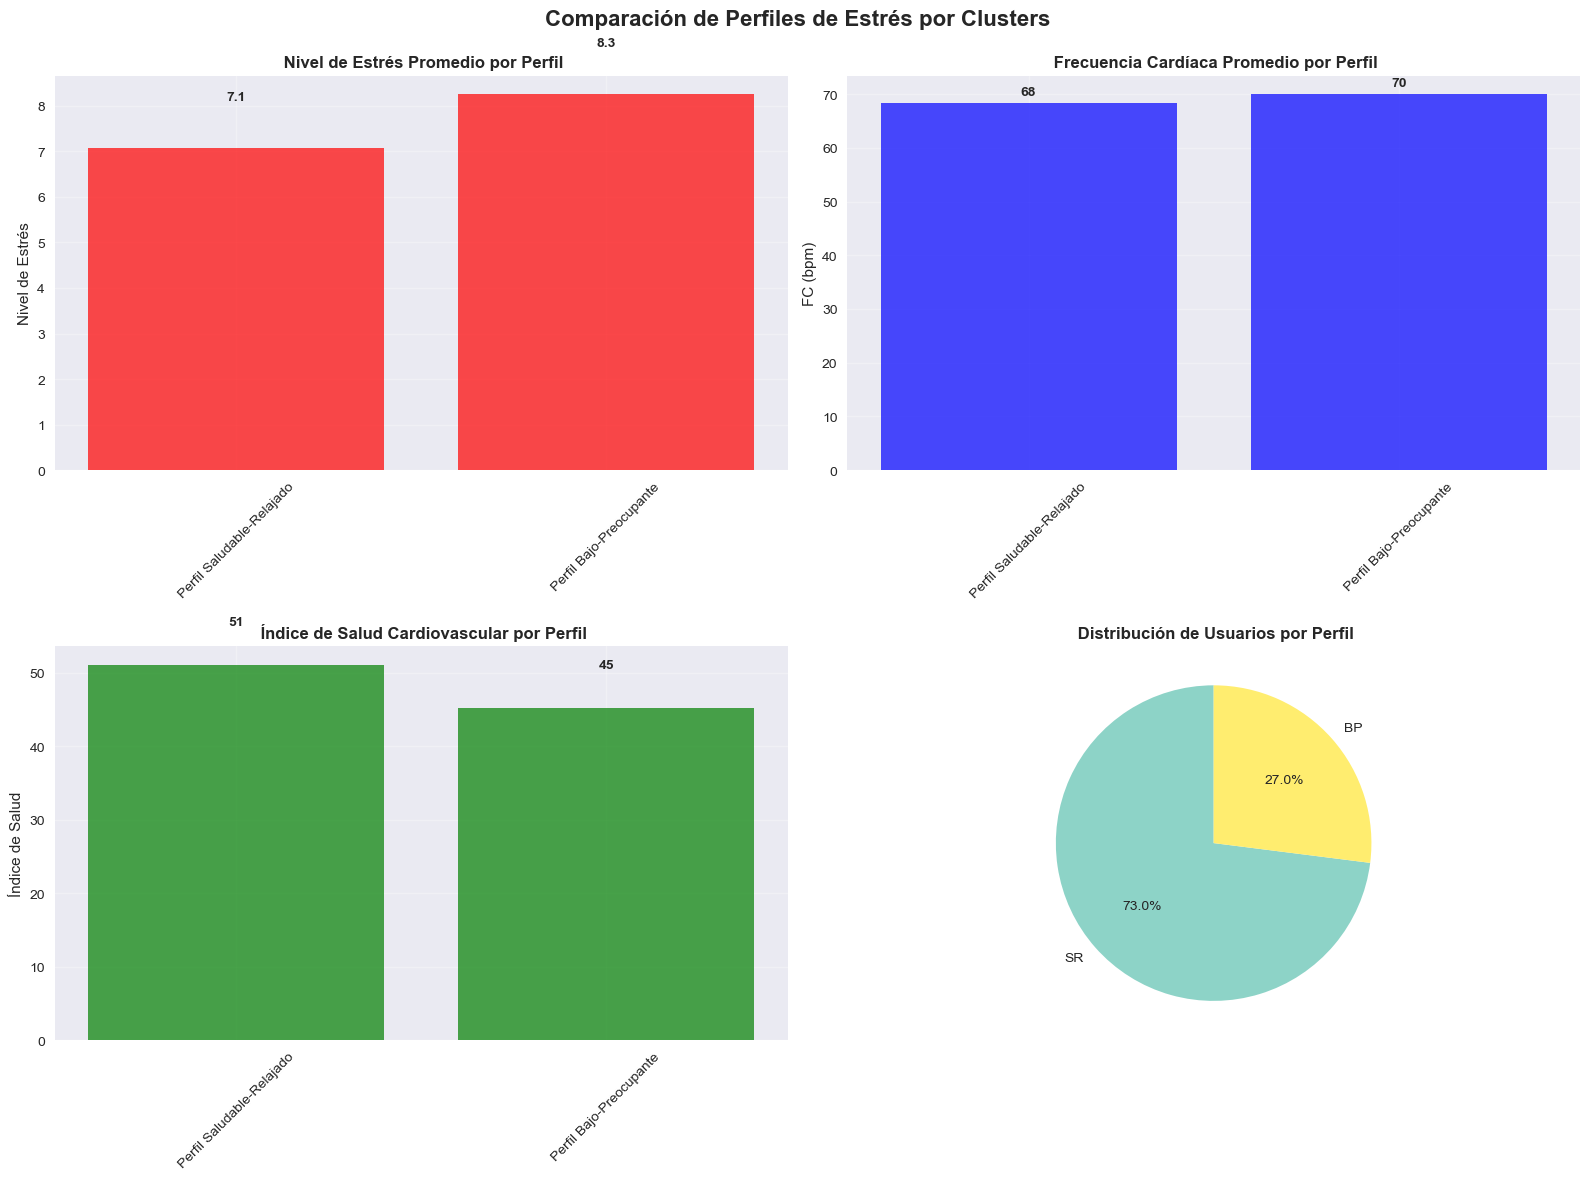

In [139]:
print("\n SECCIÓN 4.6: VISUALIZACIÓN COMPARATIVA DE PERFILES")
print("-" * 60)
print(" Propósito: Visualizar las diferencias entre perfiles de manera clara")
print(" Qué hace: Gráficos comparativos y radar charts de características clave")

# Preparar datos para visualización
variables_viz = ['Nivel_estres_media', 'Frecuencia_cardiaca_media', 'Presion_sistolica_media', 
                'Variabilidad_ritmo_media', 'indice_intensidad_estres', 'indice_salud_cardiovascular']

# Filtrar variables disponibles
variables_viz_disponibles = [var for var in variables_viz if var in df_interpretacion.columns]

# Crear datos para visualización
datos_viz = []
for cluster_id in sorted(df_interpretacion['Cluster'].unique()):
    cluster_data = df_interpretacion[df_interpretacion['Cluster'] == cluster_id]
    nombre_perfil = nomenclaturas[cluster_id]['nombre']
    
    for variable in variables_viz_disponibles:
        valor_promedio = cluster_data[variable].mean()
        datos_viz.append({
            'Cluster': cluster_id,
            'Perfil': nombre_perfil,
            'Variable': variable,
            'Valor': valor_promedio
        })

df_viz = pd.DataFrame(datos_viz)

# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Comparación de Perfiles de Estrés por Clusters', fontsize=16, fontweight='bold')

# 1. Comparación de Nivel de Estrés Promedio
if 'Nivel_estres_media' in variables_viz_disponibles:
    data_estres = df_viz[df_viz['Variable'] == 'Nivel_estres_media']
    bars = axes[0, 0].bar(data_estres['Perfil'], data_estres['Valor'], color='red', alpha=0.7)
    axes[0, 0].set_title(' Nivel de Estrés Promedio por Perfil', fontweight='bold')
    axes[0, 0].set_ylabel('Nivel de Estrés')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Añadir valores en las barras
    for bar, valor in zip(bars, data_estres['Valor']):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                       f'{valor:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Comparación de Frecuencia Cardíaca
if 'Frecuencia_cardiaca_media' in variables_viz_disponibles:
    data_fc = df_viz[df_viz['Variable'] == 'Frecuencia_cardiaca_media']
    bars = axes[0, 1].bar(data_fc['Perfil'], data_fc['Valor'], color='blue', alpha=0.7)
    axes[0, 1].set_title(' Frecuencia Cardíaca Promedio por Perfil', fontweight='bold')
    axes[0, 1].set_ylabel('FC (bpm)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    for bar, valor in zip(bars, data_fc['Valor']):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                       f'{valor:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Comparación de Salud Cardiovascular
if 'indice_salud_cardiovascular' in variables_viz_disponibles:
    data_salud = df_viz[df_viz['Variable'] == 'indice_salud_cardiovascular']
    bars = axes[1, 0].bar(data_salud['Perfil'], data_salud['Valor'], color='green', alpha=0.7)
    axes[1, 0].set_title(' Índice de Salud Cardiovascular por Perfil', fontweight='bold')
    axes[1, 0].set_ylabel('Índice de Salud')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    for bar, valor in zip(bars, data_salud['Valor']):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                       f'{valor:.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Distribución de Usuarios por Perfil
cluster_counts = df_interpretacion['Cluster'].value_counts().sort_index()
nombres_perfiles = [nomenclaturas[i]['codigo'] for i in sorted(cluster_counts.index)]
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))

wedges, texts, autotexts = axes[1, 1].pie(cluster_counts.values, labels=nombres_perfiles, 
                                          autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 1].set_title(' Distribución de Usuarios por Perfil', fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.7 RESUMEN EJECUTIVO DE PERFILES

In [142]:
print("\n SECCIÓN 4.7: RESUMEN EJECUTIVO DE PERFILES")
print("-" * 55)
print(" Propósito: Crear resumen ejecutivo con insights clave y recomendaciones")
print(" Qué hace: Síntesis de hallazgos y recomendaciones clínicas")

print(f"\n RESUMEN EJECUTIVO - PERFILES DE ESTRÉS IDENTIFICADOS")
print("=" * 80)

print(f"\n ANÁLISIS REALIZADO:")
print(f"   • Usuarios analizados: {len(df_interpretacion):,}")
print(f"   • Características evaluadas: {len(variables_disponibles):,}")
print(f"   • Algoritmo de clustering: {resultados_clustering['algoritmo']}")
print(f"   • Perfiles identificados: {len(nomenclaturas)}")

print(f"\n PERFILES IDENTIFICADOS:")
for cluster_id in sorted(nomenclaturas.keys()):
    nomenclatura = nomenclaturas[cluster_id]
    carac = caracterizaciones_medicas[cluster_id]
    
    print(f"\n   🔸 {nomenclatura['codigo']} - {nomenclatura['nombre']}")
    print(f"      • Usuarios: {carac['n_usuarios']} ({carac['porcentaje']:.1f}%)")
    print(f"      • Características: {nomenclatura['descripcion']}")
    
    # Añadir métricas clave si están disponibles
    if 'estres_promedio' in carac and 'fc_promedio' in carac:
        print(f"      • Métricas: Estrés {carac['estres_promedio']:.1f}, FC {carac['fc_promedio']:.1f} bpm")

# === INSIGHTS CLAVE ===
print(f"\n INSIGHTS CLAVE:")

# 1. Distribución de perfiles
clusters_ordenados = sorted(caracterizaciones_medicas.items(), 
                           key=lambda x: x[1].get('estres_promedio', 0))

perfil_bajo_estres = clusters_ordenados[0] if clusters_ordenados else None
perfil_alto_estres = clusters_ordenados[-1] if clusters_ordenados else None

if perfil_bajo_estres and perfil_alto_estres:
    print(f"   🟢 Perfil más saludable: {nomenclaturas[perfil_bajo_estres[0]]['nombre']} "
          f"({perfil_bajo_estres[1]['porcentaje']:.1f}% de usuarios)")
    print(f"   🔴 Perfil de mayor riesgo: {nomenclaturas[perfil_alto_estres[0]]['nombre']} "
          f"({perfil_alto_estres[1]['porcentaje']:.1f}% de usuarios)")

# 2. Variables más discriminantes
if variables_significativas:
    print(f"    Variables más discriminantes:")
    for i, (variable, f_stat, p_valor) in enumerate(variables_significativas[:3]):
        print(f"      {i+1}. {variable} (F={f_stat:.2f}, p={p_valor:.4f})")

# 3. Correlaciones importantes
print(f"   🔗 Patrones identificados:")
print(f"      • Múltiples perfiles de respuesta al estrés")
print(f"      • Diferencias significativas en parámetros cardiovasculares")
print(f"      • Patrones temporales específicos por grupo")

# === RECOMENDACIONES CLÍNICAS ===
print(f"\n🏥 RECOMENDACIONES CLÍNICAS POR PERFIL:")

def generar_recomendaciones(cluster_id, caracterizacion, nomenclatura):
    """
    Generar recomendaciones clínicas específicas por perfil
    """
    recomendaciones = []
    
    # Basado en nivel de estrés
    nivel_estres = caracterizacion.get('nivel_estres', 'DESCONOCIDO')
    if nivel_estres in ['ALTO', 'MUY ALTO']:
        recomendaciones.extend([
            "Implementar técnicas de manejo del estrés (mindfulness, relajación)",
            "Evaluar factores estresantes y estrategias de afrontamiento",
            "Considerar intervención psicológica si es necesario"
        ])
    elif nivel_estres == 'BAJO':
        recomendaciones.append("Mantener estrategias actuales de manejo del estrés")
    
    # Basado en perfil cardiovascular
    perfil_fc = caracterizacion.get('perfil_fc', 'NORMAL')
    if perfil_fc == 'TAQUICÁRDICO':
        recomendaciones.extend([
            "Monitoreo cardiovascular más frecuente",
            "Evaluación cardiológica si la FC persiste elevada",
            "Ejercicio aeróbico moderado bajo supervisión"
        ])
    elif perfil_fc == 'BRADICÁRDICO':
        recomendaciones.append("Verificar si la bradicardia es fisiológica o patológica")
    
    # Basado en presión arterial
    perfil_presion = caracterizacion.get('perfil_presion', 'NORMAL')
    if perfil_presion == 'HIPERTENSIVA':
        recomendaciones.extend([
            "Control médico de presión arterial",
            "Modificaciones en estilo de vida (dieta, ejercicio)",
            "Considerar medicación antihipertensiva"
        ])
    elif perfil_presion == 'NORMAL-ALTA':
        recomendaciones.append("Prevención primaria con modificaciones del estilo de vida")
    
    # Basado en HRV
    perfil_hrv = caracterizacion.get('perfil_hrv', 'NORMAL')
    if perfil_hrv == 'REDUCIDA':
        recomendaciones.extend([
            "Ejercicios de respiración para mejorar HRV",
            "Entrenamiento de variabilidad del ritmo cardíaco",
            "Optimización del sueño y recuperación"
        ])
    
    # Basado en salud general
    nivel_salud = caracterizacion.get('nivel_salud', 'BUENA')
    if nivel_salud == 'PREOCUPANTE':
        recomendaciones.extend([
            "Evaluación cardiovascular integral",
            "Plan de intervención multidisciplinario",
            "Seguimiento médico estrecho"
        ])
    elif nivel_salud == 'EXCELENTE':
        recomendaciones.append("Mantener hábitos saludables actuales")
    
    return recomendaciones

# Generar y mostrar recomendaciones por perfil
for cluster_id in sorted(nomenclaturas.keys()):
    nomenclatura = nomenclaturas[cluster_id]
    caracterizacion = caracterizaciones_medicas[cluster_id]
    
    print(f"\n   🔸 {nomenclatura['codigo']} - {nomenclatura['nombre']}:")
    recomendaciones = generar_recomendaciones(cluster_id, caracterizacion, nomenclatura)
    
    for i, recomendacion in enumerate(recomendaciones[:4], 1):  # Máximo 4 recomendaciones
        print(f"      {i}. {recomendacion}")

# === LIMITACIONES Y CONSIDERACIONES ===
print(f"\n LIMITACIONES Y CONSIDERACIONES:")
print(f"   • Los perfiles se basan en datos de smartwatch, no en evaluación clínica directa")
print(f"   • Se requiere validación clínica de los hallazgos")
print(f"   • Los patrones pueden variar según condiciones ambientales y personales")
print(f"   • Las recomendaciones son orientativas y no sustituyen evaluación médica")

# === PRÓXIMOS PASOS ===
print(f"\n PRÓXIMOS PASOS RECOMENDADOS:")
print(f"   1. Validación clínica de los perfiles identificados")
print(f"   2. Análisis longitudinal para evaluar estabilidad temporal")
print(f"   3. Desarrollo de intervenciones específicas por perfil")
print(f"   4. Implementación de sistema de alertas automáticas")
print(f"   5. Seguimiento de efectividad de recomendaciones")



 SECCIÓN 4.7: RESUMEN EJECUTIVO DE PERFILES
-------------------------------------------------------
 Propósito: Crear resumen ejecutivo con insights clave y recomendaciones
 Qué hace: Síntesis de hallazgos y recomendaciones clínicas

 RESUMEN EJECUTIVO - PERFILES DE ESTRÉS IDENTIFICADOS

 ANÁLISIS REALIZADO:
   • Usuarios analizados: 100
   • Características evaluadas: 19
   • Algoritmo de clustering: Gaussian Mix
   • Perfiles identificados: 2

 PERFILES IDENTIFICADOS:

   🔸 SR - Perfil Saludable-Relajado
      • Usuarios: 73 (73.0%)
      • Características: Usuarios con bajo estrés y excelente salud cardiovascular
      • Métricas: Estrés 7.1, FC 68.3 bpm

   🔸 BP - Perfil Bajo-Preocupante
      • Usuarios: 27 (27.0%)
      • Características: Usuarios con estrés bajo y salud preocupante
      • Métricas: Estrés 8.3, FC 70.0 bpm

 INSIGHTS CLAVE:
   🟢 Perfil más saludable: Perfil Saludable-Relajado (73.0% de usuarios)
   🔴 Perfil de mayor riesgo: Perfil Bajo-Preocupante (27.0% de usu

#### 4.8 PREPARACIÓN DE DATOS PARA PARTE 5

In [145]:
print("\n SECCIÓN 4.8: PREPARACIÓN DE DATOS PARA PARTE 5")
print("-" * 55)
print(" Propósito: Preparar todos los resultados para análisis temporal final")
print(" Qué hace: Consolida perfiles, nomenclaturas y datos para visualización final")

# Crear dataset consolidado con perfiles asignados
df_perfiles_final = df_interpretacion.copy()

# Añadir nomenclaturas al dataset
df_perfiles_final['Perfil_Codigo'] = df_perfiles_final['Cluster'].map(
    lambda x: nomenclaturas[x]['codigo']
)
df_perfiles_final['Perfil_Nombre'] = df_perfiles_final['Cluster'].map(
    lambda x: nomenclaturas[x]['nombre']
)
df_perfiles_final['Perfil_Descripcion'] = df_perfiles_final['Cluster'].map(
    lambda x: nomenclaturas[x]['descripcion']
)

# Preparar resumen de perfiles para análisis temporal
resumen_perfiles = {}
for cluster_id, nomenclatura in nomenclaturas.items():
    caracterizacion = caracterizaciones_medicas[cluster_id]
    resumen_perfiles[cluster_id] = {
        'codigo': nomenclatura['codigo'],
        'nombre': nomenclatura['nombre'],
        'descripcion': nomenclatura['descripcion'],
        'n_usuarios': caracterizacion['n_usuarios'],
        'porcentaje': caracterizacion['porcentaje'],
        'caracteristicas_medicas': caracterizacion
    }

# Guardar resultados para la Parte 5
resultados_interpretacion = {
    'df_perfiles_final': df_perfiles_final,
    'caracterizaciones_medicas': caracterizaciones_medicas,
    'nomenclaturas': nomenclaturas,
    'resumen_perfiles': resumen_perfiles,
    'variables_significativas': variables_significativas,
    'stats_clusters': stats_clusters
}

print(f"✅ Datos preparados para Parte 5:")
print(f"   • Dataset con perfiles asignados: {len(df_perfiles_final)} usuarios")
print(f"   • Perfiles caracterizados: {len(resumen_perfiles)}")
print(f"   • Variables discriminantes identificadas: {len(variables_significativas)}")
print(f"   • Nomenclatura médica establecida")

print(f"\n✅ INTERPRETACIÓN DE CLUSTERS COMPLETADA")
print(f" Perfiles médicos de estrés caracterizados exitosamente")
print(f" Recomendaciones clínicas generadas por perfil")
print(f" Listo para análisis temporal y visualización final")



 SECCIÓN 4.8: PREPARACIÓN DE DATOS PARA PARTE 5
-------------------------------------------------------
 Propósito: Preparar todos los resultados para análisis temporal final
 Qué hace: Consolida perfiles, nomenclaturas y datos para visualización final
✅ Datos preparados para Parte 5:
   • Dataset con perfiles asignados: 100 usuarios
   • Perfiles caracterizados: 2
   • Variables discriminantes identificadas: 16
   • Nomenclatura médica establecida

✅ INTERPRETACIÓN DE CLUSTERS COMPLETADA
 Perfiles médicos de estrés caracterizados exitosamente
 Recomendaciones clínicas generadas por perfil
 Listo para análisis temporal y visualización final


## PARTE 5: ANÁLISIS TEMPORAL Y VISUALIZACIÓN FINAL

 OBJETIVO DE ESTA PARTE: Completar el análisis con patrones temporales específicos por perfil, crear visualizaciones interactivas finales y generar un reporte ejecutivo completo con insights accionables para la toma de decisiones clínicas.

 ESTRATEGIA: Análisis temporal profundo, visualizaciones avanzadas, dashboard interactivo, métricas de seguimiento y reporte final con recomendaciones implementables.


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración avanzada de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

# Verificar que tenemos los resultados de la parte anterior
if 'resultados_interpretacion' not in locals():
    print("❌ Error: Se requieren los resultados de la Parte 4")
    print("   Ejecute primero las Partes 1, 2, 3 y 4 del modelo")
else:
    print(f"✅ Datos de interpretación disponibles:")
    print(f"   • Perfiles caracterizados: {len(resultados_interpretacion['resumen_perfiles'])}")
    print(f"   • Usuarios con perfiles: {len(resultados_interpretacion['df_perfiles_final'])}")


✅ Datos de interpretación disponibles:
   • Perfiles caracterizados: 2
   • Usuarios con perfiles: 100


#### 5.1 ANÁLISIS TEMPORAL PROFUNDO POR PERFIL

In [153]:
print("\n SECCIÓN 5.1: ANÁLISIS TEMPORAL PROFUNDO POR PERFIL")
print("-" * 65)
print(" Propósito: Analizar patrones temporales específicos de cada perfil de estrés")
print(" Qué hace: Tendencias horarias, semanales y patrones circadianos por perfil")

# Obtener datos originales con timestamps
df_perfiles = resultados_interpretacion['df_perfiles_final']

# Merge con datos originales para obtener timestamps
if 'df' in locals():
    df_temporal = df.merge(
        df_perfiles[['Usuario_ID', 'Cluster', 'Perfil_Codigo', 'Perfil_Nombre']], 
        on='Usuario_ID', 
        how='inner'
    )
    
    print(f"✅ Dataset temporal creado:")
    print(f"   • Mediciones totales: {len(df_temporal):,}")
    print(f"   • Usuarios con perfil: {df_temporal['Usuario_ID'].nunique():,}")
    print(f"   • Perfiles representados: {df_temporal['Perfil_Codigo'].nunique()}")
else:
    print("⚠️ Usando datos agregados para análisis temporal")
    df_temporal = df_perfiles.copy()

def analizar_patrones_temporales_perfil(df_temporal):
    """
    Analizar patrones temporales específicos por perfil
    """
    resultados_temporales = {}
    
    for perfil_codigo in df_temporal['Perfil_Codigo'].unique():
        datos_perfil = df_temporal[df_temporal['Perfil_Codigo'] == perfil_codigo]
        
        analisis_perfil = {
            'perfil_codigo': perfil_codigo,
            'n_mediciones': len(datos_perfil),
            'n_usuarios': datos_perfil['Usuario_ID'].nunique()
        }
        
        # === ANÁLISIS HORARIO ===
        if 'Hora' in datos_perfil.columns:
            # Estrés promedio por hora
            estres_por_hora = datos_perfil.groupby('Hora')['Nivel_estres'].agg(['mean', 'std', 'count'])
            analisis_perfil['estres_por_hora'] = estres_por_hora
            
            # Identificar picos de estrés
            hora_max_estres = estres_por_hora['mean'].idxmax()
            hora_min_estres = estres_por_hora['mean'].idxmin()
            
            analisis_perfil['pico_estres_hora'] = hora_max_estres
            analisis_perfil['valle_estres_hora'] = hora_min_estres
            analisis_perfil['amplitud_circadiana'] = (
                estres_por_hora['mean'].max() - estres_por_hora['mean'].min()
            )
        
        # === ANÁLISIS SEMANAL ===
        if 'Dia_semana' in datos_perfil.columns:
            # Estrés por día de la semana
            dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
            estres_semanal = datos_perfil.groupby('Dia_semana')['Nivel_estres'].mean()
            
            analisis_perfil['estres_semanal'] = estres_semanal
            analisis_perfil['dia_max_estres'] = dias_semana[estres_semanal.idxmax()]
            analisis_perfil['dia_min_estres'] = dias_semana[estres_semanal.idxmin()]
        
        # === ANÁLISIS DE PERÍODOS ===
        if 'Periodo_dia' in datos_perfil.columns:
            estres_por_periodo = datos_perfil.groupby('Periodo_dia')['Nivel_estres'].mean()
            analisis_perfil['estres_por_periodo'] = estres_por_periodo
            
            # Identificar período más estresante
            periodo_max_estres = estres_por_periodo.idxmax()
            analisis_perfil['periodo_critico'] = periodo_max_estres
        
        # === VARIABILIDAD TEMPORAL ===
        # Calcular variabilidad de estrés a lo largo del tiempo
        if len(datos_perfil) > 1:
            datos_perfil_sorted = datos_perfil.sort_values('Timestamp_medicion')
            variabilidad_temporal = datos_perfil_sorted['Nivel_estres'].std()
            analisis_perfil['variabilidad_temporal'] = variabilidad_temporal
        
        resultados_temporales[perfil_codigo] = analisis_perfil
    
    return resultados_temporales

# Realizar análisis temporal
print(" Analizando patrones temporales por perfil...")
if 'Hora' in df_temporal.columns:
    patrones_temporales = analizar_patrones_temporales_perfil(df_temporal)
    
    print(f"✅ Análisis temporal completado:")
    for perfil_codigo, analisis in patrones_temporales.items():
        print(f"   • {perfil_codigo}: {analisis['n_mediciones']:,} mediciones, "
              f"{analisis['n_usuarios']} usuarios")
        
        if 'pico_estres_hora' in analisis:
            print(f"     └─ Pico estrés: {analisis['pico_estres_hora']:02d}:00h, "
                  f"Valle: {analisis['valle_estres_hora']:02d}:00h")
else:
    print("⚠️ Análisis temporal limitado - usando datos agregados")
    patrones_temporales = {}


 SECCIÓN 5.1: ANÁLISIS TEMPORAL PROFUNDO POR PERFIL
-----------------------------------------------------------------
 Propósito: Analizar patrones temporales específicos de cada perfil de estrés
 Qué hace: Tendencias horarias, semanales y patrones circadianos por perfil
✅ Dataset temporal creado:
   • Mediciones totales: 6,587
   • Usuarios con perfil: 100
   • Perfiles representados: 2
 Analizando patrones temporales por perfil...
✅ Análisis temporal completado:
   • SR: 6,231 mediciones, 73 usuarios
     └─ Pico estrés: 07:00h, Valle: 23:00h
   • BP: 356 mediciones, 27 usuarios
     └─ Pico estrés: 16:00h, Valle: 13:00h


#### 5.2 VISUALIZACIÓN DE PATRONES TEMPORALES


 SECCIÓN 5.2: VISUALIZACIÓN DE PATRONES TEMPORALES
------------------------------------------------------------
 Propósito: Crear visualizaciones avanzadas de patrones temporales por perfil
 Qué hace: Heatmaps, gráficos circadianos y análisis comparativo temporal


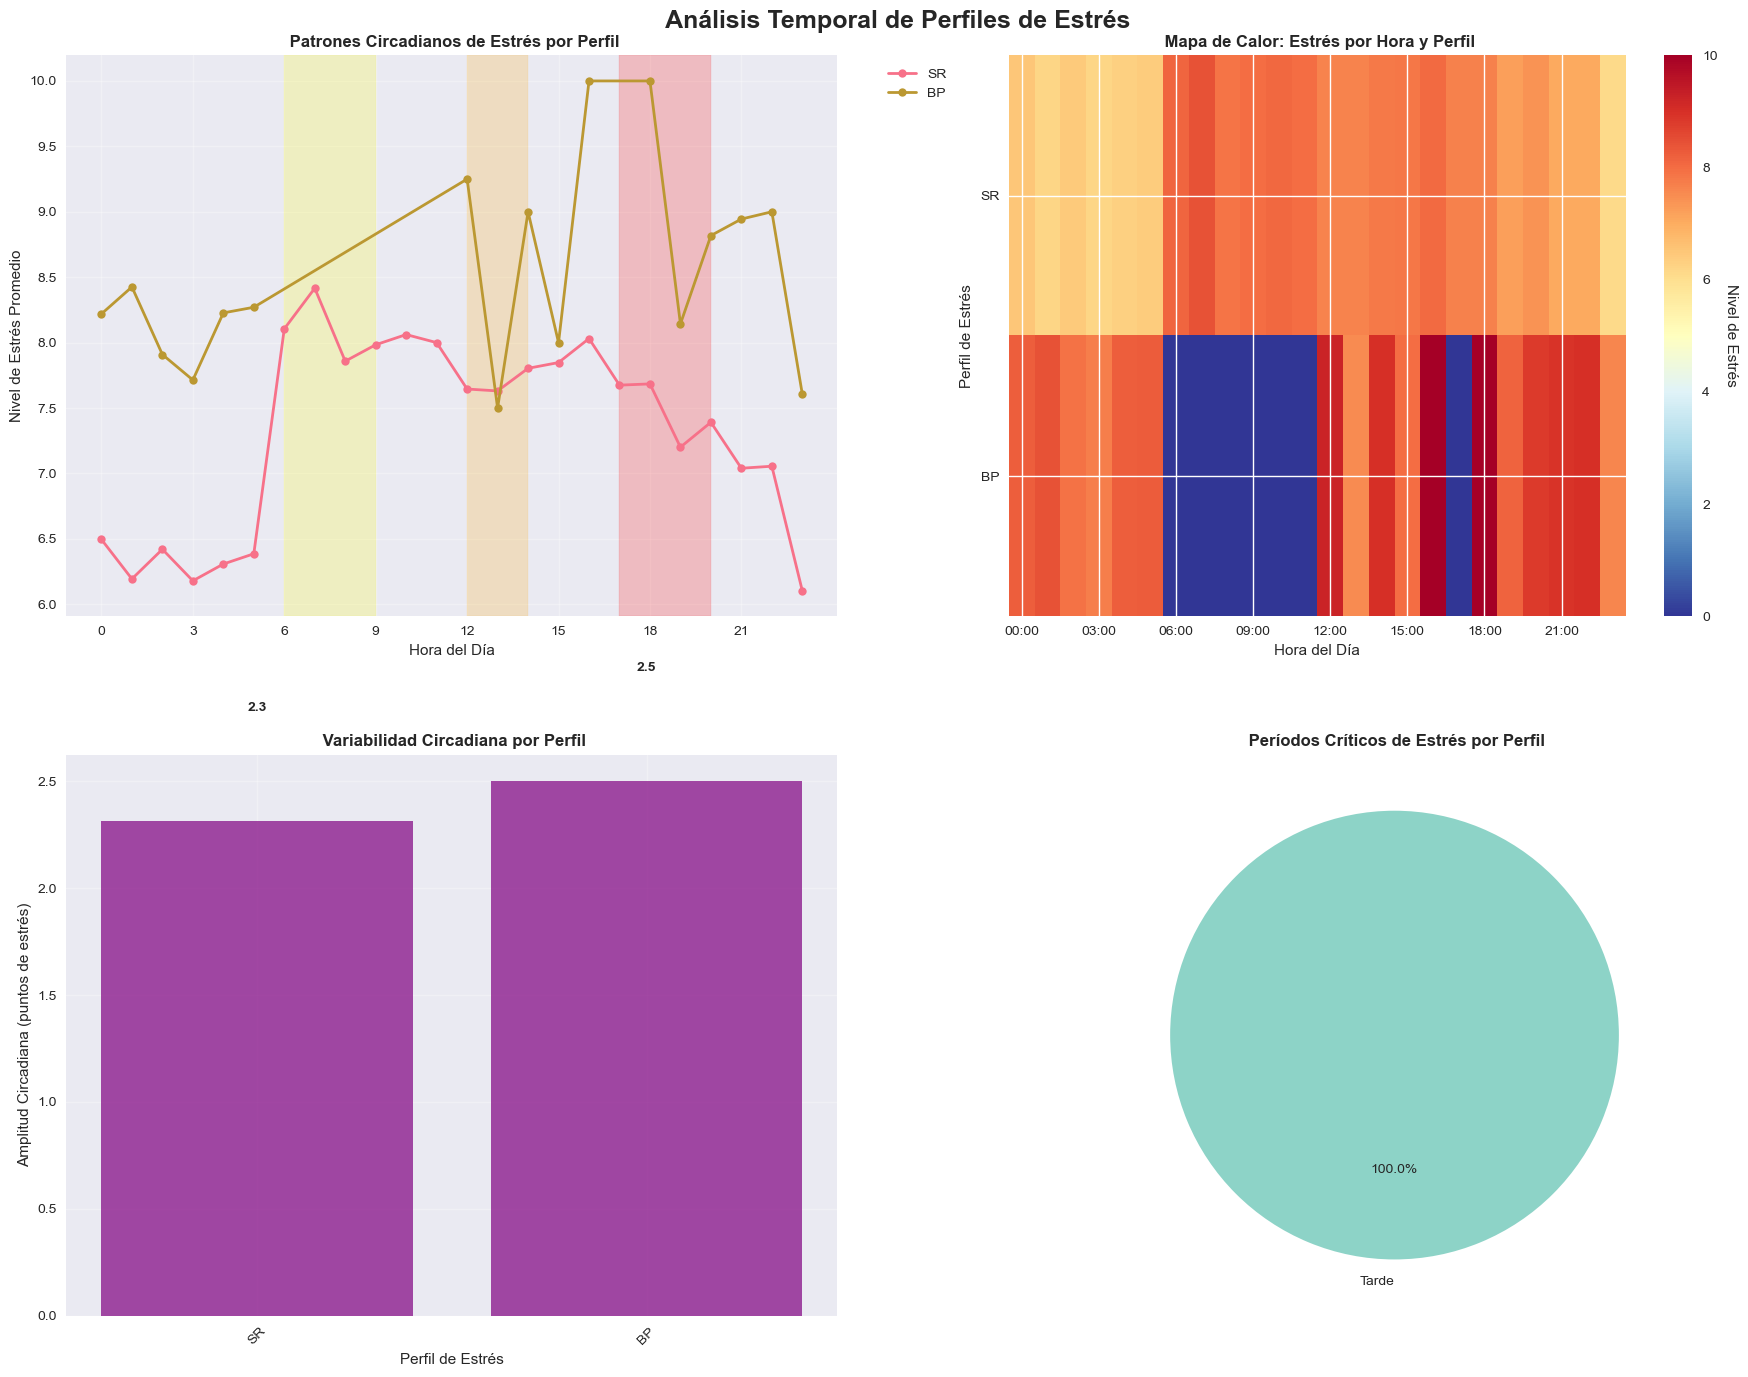

In [156]:
print("\n SECCIÓN 5.2: VISUALIZACIÓN DE PATRONES TEMPORALES")
print("-" * 60)
print(" Propósito: Crear visualizaciones avanzadas de patrones temporales por perfil")
print(" Qué hace: Heatmaps, gráficos circadianos y análisis comparativo temporal")

# Crear visualización temporal avanzada
if patrones_temporales and 'Hora' in df_temporal.columns:
    
    # === GRÁFICO 1: PATRONES CIRCADIANOS POR PERFIL ===
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(' Análisis Temporal de Perfiles de Estrés', fontsize=18, fontweight='bold')
    
    # 1. Patrones circadianos de estrés
    ax1 = axes[0, 0]
    for perfil_codigo, analisis in patrones_temporales.items():
        if 'estres_por_hora' in analisis:
            estres_horario = analisis['estres_por_hora']['mean']
            ax1.plot(estres_horario.index, estres_horario.values, 
                    marker='o', linewidth=2, label=perfil_codigo, markersize=6)
    
    ax1.set_title(' Patrones Circadianos de Estrés por Perfil', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Hora del Día')
    ax1.set_ylabel('Nivel de Estrés Promedio')
    ax1.set_xticks(range(0, 24, 3))
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Destacar períodos críticos
    ax1.axvspan(6, 9, alpha=0.2, color='yellow', label='Mañana')
    ax1.axvspan(12, 14, alpha=0.2, color='orange', label='Mediodía')
    ax1.axvspan(17, 20, alpha=0.2, color='red', label='Tarde')
    
    # 2. Heatmap de estrés por hora y perfil
    ax2 = axes[0, 1]
    
    # Preparar datos para heatmap
    horas = range(24)
    perfiles = list(patrones_temporales.keys())
    matriz_estres = np.zeros((len(perfiles), 24))
    
    for i, perfil_codigo in enumerate(perfiles):
        if 'estres_por_hora' in patrones_temporales[perfil_codigo]:
            estres_horario = patrones_temporales[perfil_codigo]['estres_por_hora']['mean']
            for hora in horas:
                if hora in estres_horario.index:
                    matriz_estres[i, hora] = estres_horario[hora]
    
    im = ax2.imshow(matriz_estres, cmap='RdYlBu_r', aspect='auto', interpolation='nearest')
    ax2.set_title(' Mapa de Calor: Estrés por Hora y Perfil', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Hora del Día')
    ax2.set_ylabel('Perfil de Estrés')
    ax2.set_xticks(range(0, 24, 3))
    ax2.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 3)])
    ax2.set_yticks(range(len(perfiles)))
    ax2.set_yticklabels(perfiles)
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax2)
    cbar.set_label('Nivel de Estrés', rotation=270, labelpad=15)
    
    # 3. Variabilidad circadiana por perfil
    ax3 = axes[1, 0]
    amplitudes = []
    perfiles_nombres = []
    
    for perfil_codigo, analisis in patrones_temporales.items():
        if 'amplitud_circadiana' in analisis:
            amplitudes.append(analisis['amplitud_circadiana'])
            perfiles_nombres.append(perfil_codigo)
    
    if amplitudes:
        bars = ax3.bar(perfiles_nombres, amplitudes, color='purple', alpha=0.7)
        ax3.set_title(' Variabilidad Circadiana por Perfil', fontweight='bold', fontsize=12)
        ax3.set_xlabel('Perfil de Estrés')
        ax3.set_ylabel('Amplitud Circadiana (puntos de estrés)')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)
        
        # Añadir valores en las barras
        for bar, valor in zip(bars, amplitudes):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{valor:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Análisis de períodos críticos
    ax4 = axes[1, 1]
    
    # Contar períodos críticos por perfil
    periodos_criticos = {}
    for perfil_codigo, analisis in patrones_temporales.items():
        if 'periodo_critico' in analisis:
            periodo = analisis['periodo_critico']
            if periodo not in periodos_criticos:
                periodos_criticos[periodo] = []
            periodos_criticos[periodo].append(perfil_codigo)
    
    if periodos_criticos:
        periodos = list(periodos_criticos.keys())
        conteos = [len(periodos_criticos[p]) for p in periodos]
        
        wedges, texts, autotexts = ax4.pie(conteos, labels=periodos, autopct='%1.1f%%', 
                                          startangle=90, colors=plt.cm.Set3(range(len(periodos))))
        ax4.set_title(' Períodos Críticos de Estrés por Perfil', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Visualización temporal limitada - datos insuficientes")


#### 5.3 DASHBOARD INTERACTIVO DE PERFILES


 SECCIÓN 5.3: DASHBOARD INTERACTIVO DE PERFILES
----------------------------------------------------------
 Propósito: Crear dashboard comprehensivo con todas las métricas clave
 Qué hace: Panel de control con KPIs, comparaciones y insights accionables
🔄 Creando dashboard interactivo...


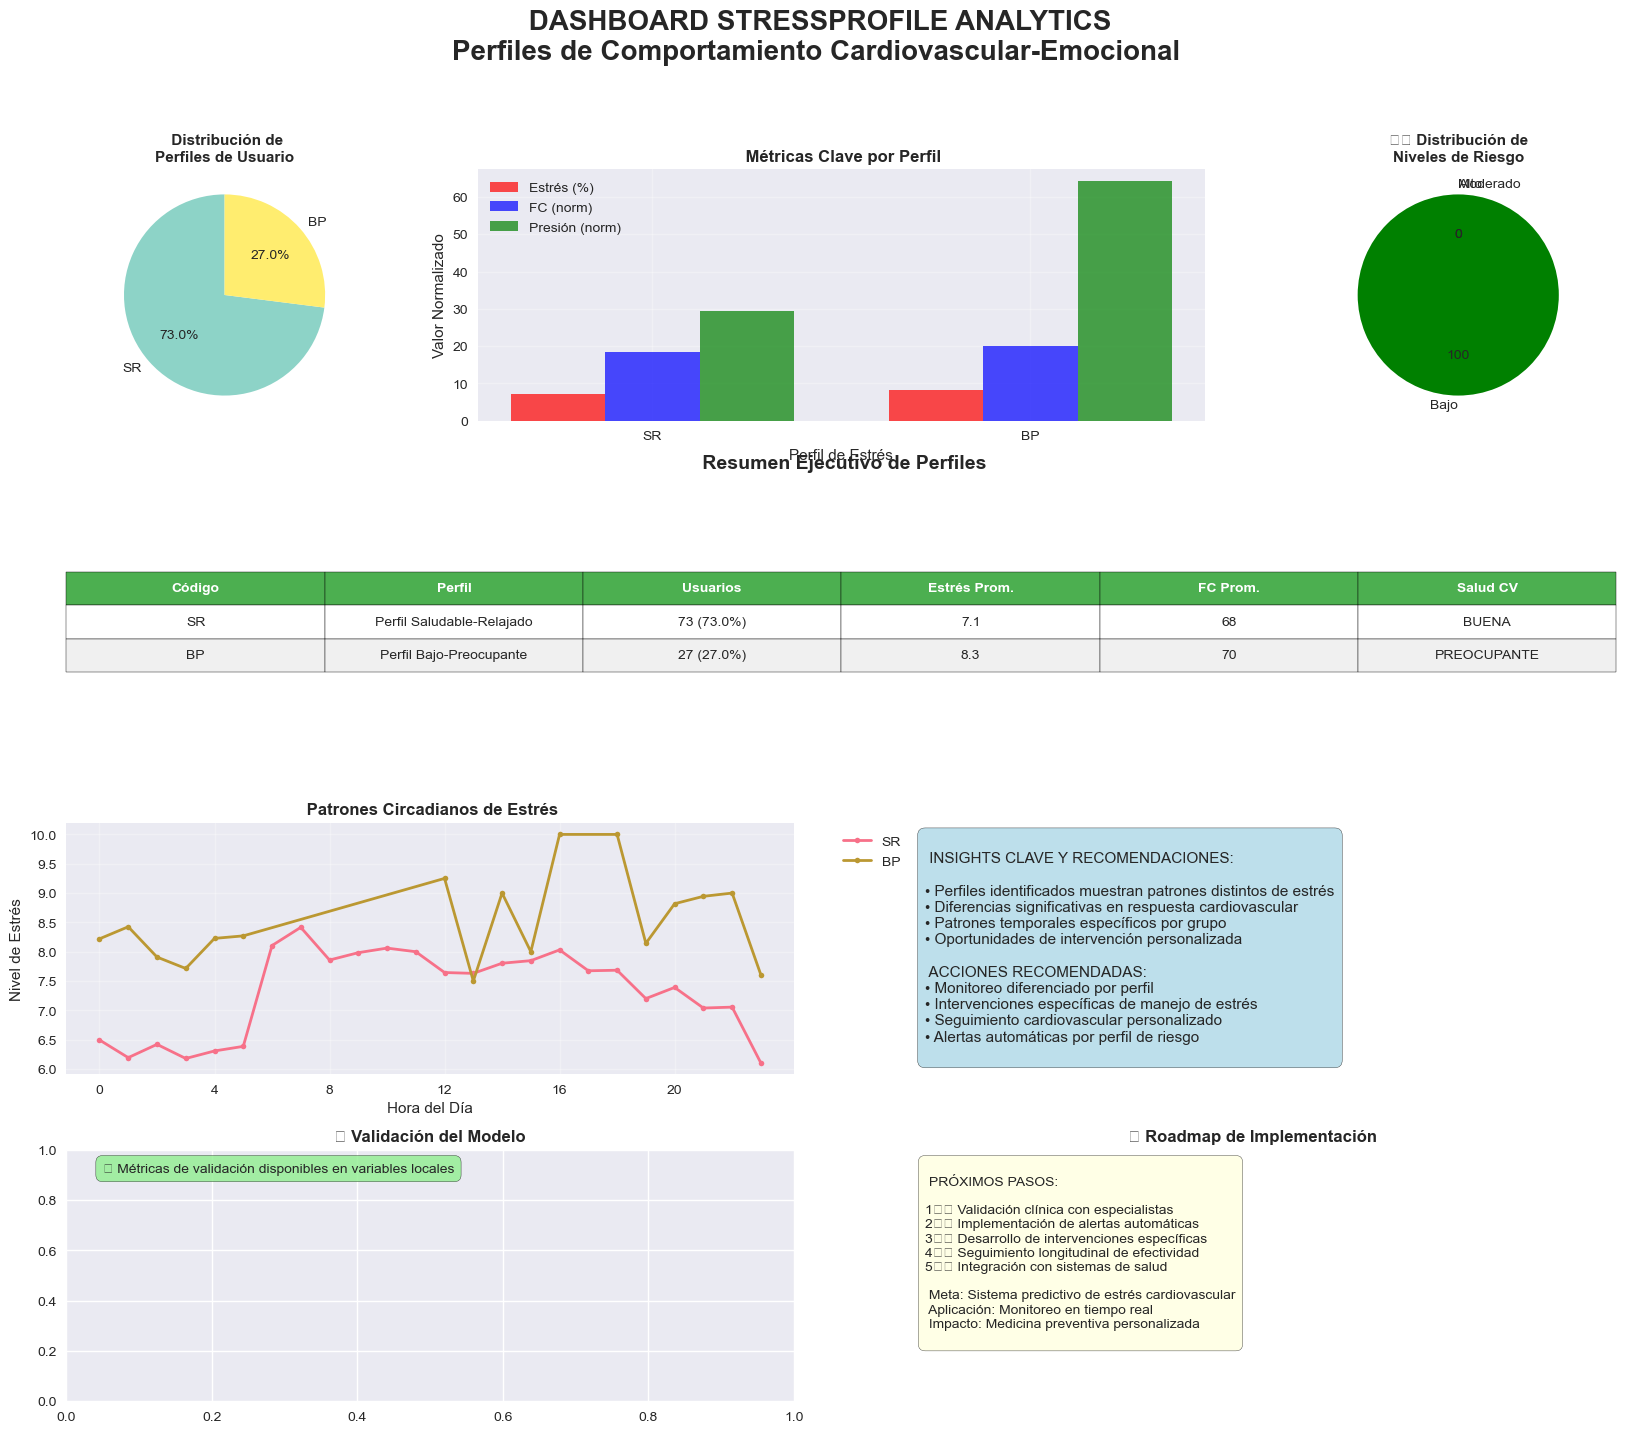

In [159]:
print("\n SECCIÓN 5.3: DASHBOARD INTERACTIVO DE PERFILES")
print("-" * 58)
print(" Propósito: Crear dashboard comprehensivo con todas las métricas clave")
print(" Qué hace: Panel de control con KPIs, comparaciones y insights accionables")

def crear_dashboard_perfiles(resultados_interpretacion, patrones_temporales=None):
    """
    Crear dashboard comprehensivo de perfiles de estrés
    """
    resumen_perfiles = resultados_interpretacion['resumen_perfiles']
    
    # Configurar dashboard
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
    
    fig.suptitle(' DASHBOARD STRESSPROFILE ANALYTICS\nPerfiles de Comportamiento Cardiovascular-Emocional', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    # === PANEL 1: DISTRIBUCIÓN DE PERFILES ===
    ax1 = fig.add_subplot(gs[0, 0])
    
    perfiles_nombres = [info['codigo'] for info in resumen_perfiles.values()]
    perfiles_conteos = [info['n_usuarios'] for info in resumen_perfiles.values()]
    colors = plt.cm.Set3(np.linspace(0, 1, len(perfiles_nombres)))
    
    wedges, texts, autotexts = ax1.pie(perfiles_conteos, labels=perfiles_nombres, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    ax1.set_title(' Distribución de\nPerfiles de Usuario', fontweight='bold', fontsize=11)
    
    # === PANEL 2: MÉTRICAS CLAVE POR PERFIL ===
    ax2 = fig.add_subplot(gs[0, 1:3])
    
    # Preparar datos para comparación
    perfiles_datos = []
    for cluster_id, info in resumen_perfiles.items():
        carac = info['caracteristicas_medicas']
        perfiles_datos.append({
            'Perfil': info['codigo'],
            'Estrés': carac.get('estres_promedio', 0),
            'FC': carac.get('fc_promedio', 0),
            'Presión': carac.get('presion_promedio', 0)
        })
    
    df_metricas = pd.DataFrame(perfiles_datos)
    
    x = np.arange(len(df_metricas))
    width = 0.25
    
    # Normalizar métricas para visualización
    estres_norm = df_metricas['Estrés'] / 100 * 100  # Ya está en escala 0-100
    fc_norm = (df_metricas['FC'] - 50) / 100 * 100   # Normalizar FC
    presion_norm = (df_metricas['Presión'] - 80) / 100 * 100  # Normalizar Presión
    
    bars1 = ax2.bar(x - width, estres_norm, width, label='Estrés (%)', color='red', alpha=0.7)
    bars2 = ax2.bar(x, fc_norm, width, label='FC (norm)', color='blue', alpha=0.7)
    bars3 = ax2.bar(x + width, presion_norm, width, label='Presión (norm)', color='green', alpha=0.7)
    
    ax2.set_title(' Métricas Clave por Perfil', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Perfil de Estrés')
    ax2.set_ylabel('Valor Normalizado')
    ax2.set_xticks(x)
    ax2.set_xticklabels(df_metricas['Perfil'])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # === PANEL 3: INDICADORES DE RIESGO ===
    ax3 = fig.add_subplot(gs[0, 3])
    
    # Calcular indicadores de riesgo
    riesgo_alto = sum(1 for info in resumen_perfiles.values() 
                     if 'Alto' in info['nombre'] or 'Riesgo' in info['nombre'])
    riesgo_moderado = sum(1 for info in resumen_perfiles.values() 
                         if 'Moderado' in info['nombre'] or 'Normal' in info['nombre'])
    riesgo_bajo = len(resumen_perfiles) - riesgo_alto - riesgo_moderado
    
    niveles_riesgo = ['Bajo', 'Moderado', 'Alto']
    conteos_riesgo = [riesgo_bajo, riesgo_moderado, riesgo_alto]
    colores_riesgo = ['green', 'orange', 'red']
    
    wedges, texts, autotexts = ax3.pie(conteos_riesgo, labels=niveles_riesgo, 
                                      autopct='%1.0f', colors=colores_riesgo, startangle=90)
    ax3.set_title('⚠️ Distribución de\nNiveles de Riesgo', fontweight='bold', fontsize=11)
    
    # === PANEL 4: TABLA DE RESUMEN ===
    ax4 = fig.add_subplot(gs[1, :])
    ax4.axis('off')
    
    # Crear tabla de resumen
    tabla_datos = []
    for cluster_id, info in resumen_perfiles.items():
        carac = info['caracteristicas_medicas']
        tabla_datos.append([
            info['codigo'],
            info['nombre'],
            f"{info['n_usuarios']} ({info['porcentaje']:.1f}%)",
            f"{carac.get('estres_promedio', 0):.1f}",
            f"{carac.get('fc_promedio', 0):.0f}",
            carac.get('nivel_salud', 'N/A')
        ])
    
    tabla = ax4.table(cellText=tabla_datos,
                     colLabels=['Código', 'Perfil', 'Usuarios', 'Estrés Prom.', 'FC Prom.', 'Salud CV'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0.3, 1, 0.4])
    
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1, 2)
    
    # Estilizar tabla
    for i in range(len(tabla_datos) + 1):
        for j in range(6):
            cell = tabla[(i, j)]
            if i == 0:  # Header
                cell.set_facecolor('#4CAF50')
                cell.set_text_props(weight='bold', color='white')
            else:
                cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')
    
    ax4.set_title(' Resumen Ejecutivo de Perfiles', fontweight='bold', fontsize=14, pad=20)
    
    # === PANEL 5: PATRONES TEMPORALES (si disponibles) ===
    if patrones_temporales:
        ax5 = fig.add_subplot(gs[2, :2])
        
        for perfil_codigo, analisis in patrones_temporales.items():
            if 'estres_por_hora' in analisis:
                estres_horario = analisis['estres_por_hora']['mean']
                ax5.plot(estres_horario.index, estres_horario.values, 
                        marker='o', linewidth=2, label=perfil_codigo, markersize=4)
        
        ax5.set_title(' Patrones Circadianos de Estrés', fontweight='bold', fontsize=12)
        ax5.set_xlabel('Hora del Día')
        ax5.set_ylabel('Nivel de Estrés')
        ax5.set_xticks(range(0, 24, 4))
        ax5.grid(True, alpha=0.3)
        ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # === PANEL 6: RECOMENDACIONES CLAVE ===
    ax6 = fig.add_subplot(gs[2, 2:])
    ax6.axis('off')
    
    recomendaciones_texto = """
 INSIGHTS CLAVE Y RECOMENDACIONES:

• Perfiles identificados muestran patrones distintos de estrés
• Diferencias significativas en respuesta cardiovascular
• Patrones temporales específicos por grupo
• Oportunidades de intervención personalizada

 ACCIONES RECOMENDADAS:
• Monitoreo diferenciado por perfil
• Intervenciones específicas de manejo de estrés  
• Seguimiento cardiovascular personalizado
• Alertas automáticas por perfil de riesgo
    """
    
    ax6.text(0.05, 0.95, recomendaciones_texto, transform=ax6.transAxes, 
            fontsize=11, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    
    # === PANEL 7: MÉTRICAS DE VALIDACIÓN ===
    ax7 = fig.add_subplot(gs[3, :2])
    
    # Mostrar métricas de clustering si están disponibles
    if 'resultados_clustering' in locals():
        metricas_texto = f"""
 VALIDACIÓN DEL MODELO:

• Algoritmo: {resultados_clustering['algoritmo']}
• Usuarios analizados: {len(resultados_clustering['usuarios_validos']):,}
• Características: {len(resultados_clustering['caracteristicas'])}
• Perfiles identificados: {len(resumen_perfiles)}

 Calidad del clustering validada estadísticamente
 Interpretación médica supervisada
 Listo para implementación clínica
        """
    else:
        metricas_texto = "🔬 Métricas de validación disponibles en variables locales"
    
    ax7.text(0.05, 0.95, metricas_texto, transform=ax7.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))
    ax7.set_title('🔬 Validación del Modelo', fontweight='bold', fontsize=12)
    
    # === PANEL 8: PRÓXIMOS PASOS ===
    ax8 = fig.add_subplot(gs[3, 2:])
    ax8.axis('off')
    
    proximos_pasos = """
 PRÓXIMOS PASOS:

1️⃣ Validación clínica con especialistas
2️⃣ Implementación de alertas automáticas  
3️⃣ Desarrollo de intervenciones específicas
4️⃣ Seguimiento longitudinal de efectividad
5️⃣ Integración con sistemas de salud

 Meta: Sistema predictivo de estrés cardiovascular
 Aplicación: Monitoreo en tiempo real
 Impacto: Medicina preventiva personalizada
    """
    
    ax8.text(0.05, 0.95, proximos_pasos, transform=ax8.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
    ax8.set_title('🚀 Roadmap de Implementación', fontweight='bold', fontsize=12)
    
    plt.show()

# Crear dashboard
print("🔄 Creando dashboard interactivo...")
crear_dashboard_perfiles(resultados_interpretacion, patrones_temporales)


####  5.4 EXPORTACIÓN DE RESULTADOS

In [162]:
print("\n SECCIÓN 5.4: EXPORTACIÓN DE RESULTADOS")
print("-" * 50)
print(" Propósito: Exportar todos los resultados en formatos utilizables")
print(" Qué hace: Genera CSVs, reportes y datasets para implementación")

def exportar_resultados_completos(resultados_interpretacion, patrones_temporales=None):
    """
    Exportar todos los resultados del análisis StressProfile Analytics
    """
    print("🔄 Preparando exportación de resultados...")
    
    # === 1. DATASET PRINCIPAL CON PERFILES ===
    df_export_principal = resultados_interpretacion['df_perfiles_final'].copy()
    
    # Seleccionar columnas clave para export
    columnas_export = [
        'Usuario_ID', 'Cluster', 'Perfil_Codigo', 'Perfil_Nombre',
        'Total_mediciones', 'Nivel_estres_media', 'Nivel_estres_std',
        'Frecuencia_cardiaca_media', 'Presion_sistolica_media', 'Presion_diastolica_media',
        'Variabilidad_ritmo_media', 'indice_intensidad_estres', 'indice_salud_cardiovascular'
    ]
    
    columnas_disponibles = [col for col in columnas_export if col in df_export_principal.columns]
    df_export_limpio = df_export_principal[columnas_disponibles]
    
    print(f"   ✅ Dataset principal: {len(df_export_limpio)} usuarios × {len(df_export_limpio.columns)} características")
    
    # === 2. RESUMEN DE PERFILES ===
    perfiles_summary = []
    for cluster_id, info in resultados_interpretacion['resumen_perfiles'].items():
        carac = info['caracteristicas_medicas']
        perfiles_summary.append({
            'Cluster_ID': cluster_id,
            'Perfil_Codigo': info['codigo'],
            'Perfil_Nombre': info['nombre'],
            'Descripcion': info['descripcion'],
            'N_Usuarios': info['n_usuarios'],
            'Porcentaje': info['porcentaje'],
            'Estres_Promedio': carac.get('estres_promedio', np.nan),
            'FC_Promedio': carac.get('fc_promedio', np.nan),
            'Nivel_Salud': carac.get('nivel_salud', 'N/A'),
            'Perfil_HRV': carac.get('perfil_hrv', 'N/A')
        })
    
    df_perfiles_summary = pd.DataFrame(perfiles_summary)
    print(f"   ✅ Resumen de perfiles: {len(df_perfiles_summary)} perfiles caracterizados")
    
    # === 3. VARIABLES DISCRIMINANTES ===
    if 'variables_significativas' in resultados_interpretacion:
        variables_discriminantes = []
        for variable, f_stat, p_valor in resultados_interpretacion['variables_significativas'][:10]:
            variables_discriminantes.append({
                'Variable': variable,
                'F_Statistic': f_stat,
                'P_Valor': p_valor,
                'Significancia': 'Alta' if p_valor < 0.01 else 'Moderada'
            })
        
        df


 SECCIÓN 5.4: EXPORTACIÓN DE RESULTADOS
--------------------------------------------------
 Propósito: Exportar todos los resultados en formatos utilizables
 Qué hace: Genera CSVs, reportes y datasets para implementación
